# Classificação de arritmia usando Suport Vector Machines (SVM)

<img src="hyperplanes1.png" width=300 height=450 /> <img src="hyperplanes2.png" width=300 height=400 />

O algoritmo SVM utiliza hiperplanos para realizar a separação dos dados de acordo com as classes alvos (figura a esquerda). Há vários hiperplanos que podem ser escolhidos para essa tarefa. O algoritmo busca otimizar a busca pelo melhor hiperplano possível através da maximização da margem entre os vetores suportes (pontos localizados nos extremos da margem do hiperplano (figura a direita). A dimensão do hiperplano depende diretamente do número de características do conjunto de dados ($n$), sendo hiperplano de ($n-1$)-dimensão. Ou seja, quanto mais características mais difícil de obter o hiperplano. 

<img src="hyperplanes4.png" width=400 height=400 /> <img src="hyperplanes3.png" width=600 height=400 />

Na busca pelo melhor hiperplano, o SVM procura encontrar os vetores suportes com maior distância entre o centro do próprio hiperplano. Na figura a esquerda, o hiperplano `H2` separa os dados perfeitamente, porém se comparado com o hiperplano `H4`, a distância dos vetores de suporte do `H4` é maior do que `H2`. Enquanto isso, o hiperplano `H1` não consegue separar o conjunto de dados. 

Outro fator importante no SVM é a possibilidade de não conseguir separar os dados perfeitamente. Como solução, o SVM utiliza uma margem suave (_soft-margin_), que permite que algus pontos sejam classificados erroneamente ou estejam dentro da margem do hiperplano. Como controle, o SVM utiliza um valor de "folga" ($\xi$) para tal. O algoritmo permite o controle desta "classificação errada" através do hiper-parâmetro `C`. Essencialmente, `C` age como um peso para $\xi$. Um baixo valor de `C` torna a região de decisão mais suave (mais robusta), enquanto um `C` alto visa classificar todos os exemplos de treinamento corretamente, produzindo um ajuste mais próximo aos dados de treinamento, mas tornando-os menos robustos. 
OBS.: configurando um alto de valor para `C`, pode apresentar uma alta performance do modelo no conjunto de treino, causando _overfitting_ do modelo e consequentemente resultados baixos no conjunto de teste. 

Porém, na maioria dos casos, um hiperplano linear não é capaz de realizar a separação dos dados de forma satisfatória em problema não-lineares. Para isso, o SVM utiliza de funções `kernels`. Um `kernel` é uma função que pega o problema não linear original e o transforma em um problema linear dentro do espaço de dimensão superior (figura a direita). Por padrão, SVM utiliza *radial basis function (RBF)* que pode ser descrito como:

$$K(x,x') = e^{-\gamma||x-x'||^2}$$

onde $\gamma$ pode ser manualmente configurado e precisa ser maior que $0$. $||x - x'||^2$ é a distância euclidiana quadrática entre dois dois vetores de características (dois pontos). Por padrão, gamma é:

$$\gamma = \dfrac{1}{n_{features}*\sigma^2}$$

Pode-se pensar no $\gamma$ como uma "propagação" do kernel e, portanto, uma região de decisão. Quando $\gamma$ é baixo, a "curva" do limite de decisão é muito baixa e, portanto, a região de decisão é muito ampla. Quando $\gamma$ é alto, a "curva" do limite de decisão é alta, o que cria ilhas de limites de decisão em torno dos pontos de dados.


------------------------------------------------------------------------------------------------------------------------------------
Para avaliação dos modelos, será utilizado as seguintes métricas:

+ `Accuracy`: proporção de resultados verdadeiro em relação ao número total de casos examinados.

+ `Precision`: proporção de positivos preditos que realmente são positivos.

+ `Recall`: proporção de positivos que foram classificados corretamente.

+ `F1-score`: média harmônica entre precision e recall.

Como analogia, temos:

_"Se você é um inspetor policial e você quer prender criminosos, você quer ter certeza que a pessoa que você prendeu é um criminoso (precision) e você também quer prender muitos crimonosos quanto for possível (recall). O F1 score mede este tradeoff."_

-------------------------------------------------------------------------------------------------------------------------------------

`Classificação`

No processo de classificação, será testado dois tipos de conjuntos de classes. O primeiro com 11 classes e o outro com 04 classes. 


+ Características: 

| **Características**   |  **Características**   | **Características**   | **Características**   |
| ------------   |  ------------   | ------------   | ------------   |
|   PatientAge   | VentricularRate |   AtrialRate   |   QRSDuration  |
|   QTInterval   |   QTCorrected   |      RAxis     |      TAxis     |
|    QRSCount    |      QOnset     |     QOffset    |    
| Gender_FEMALE  |   Gender_MALE   |     TOffset    | 

+ Classes  com 11 classes: 

| **Classes** |    **Classes**    |   **Classes**   |   **Classes**    |
| ----  |  ----   | ----  | ----   |
| AFIB  |    SB   |  SA   |   AF   |
|  SR   |    ST   |  SVT  |   AT   |
| AVNRT |  SAAWR  |  AVRT | 

+ Classes com 04 classes: 

| **Classes** |    **Grouped Classes**    |  
| :-----:  |  :--------------   |
|   AF  |      [AFIB - AF]           |  
| GSVT  |  [SVT  - AT - SA - SAAWR - ST - AVNRT - AVRT] |
| SB    |  [SB] |
| SR    |  [SR - SI]|

-------------------------------------------------------------------------------------------------------------------------------------

# Índice

- [1. Importando pacotes](#1)
- [2. Carregando arquivos](#2)
- [3. Criando relatório da análise total do dataset](#3)
- [4. Convertendo atributo categórico _Gender_ para númerico utilizando one hot coding](#4)
- [5. Agrupando a classe de arritmias _Rhythm_](#5)
- [6. Removendo atributos _(FileName, Beat)_ e removendo duplicatas](#6)
- [7. Verificando a distribuição das classes](#7)
- [8. Seleção de atributos](#8)
- [9. Função para classificação](#9)
- [10. Classificação com 11 classes](#10)
- [11. Classificação com 04 classes](#11)
- [12. Classificação com remoção de outliers do atributo `AGE` e com 04 classes](#12)
- [13. Classificação com remoção do atributo `Gender` e com 04 classes](#13)
- [14. Classificação com remoção do atributo `Gender`, dos outliers do atributo `Age` e com 04 classes](#14)
- [15. Classificação com a seleção de atributos (alta correlação > 0.7) e com 04 classes](#15)
- [16. Classificação com a seleção de atributos (alta correlação > 0.7), remoção da atributo `Gender` e com 04 classes](#16)
- [17. Classificação com a seleção de atributos (alta correlação > 0.7), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes](#17)
- [18. Classificação com a seleção de atributos (alta correlação > 0.9) e com 04 classes](#18)
- [19. Classificação com a seleção de atributos (alta correlação > 0.9), remoção da atributo `Gender` e com 04 classes](#19)
- [20. Classificação com a seleção de atributos (alta correlação > 0.9), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes](#20)
- [21. Classificação com seleção de atributos (PCA) e com 04 classes](#21)
- [22. Classificação com a seleção de atributos (PCA), remoção da atributo `Gender` e com 04 classes](#22)
- [23. Classificação com a seleção de atributos (PCA), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes](#23)
- [24. Conclusão](#24)


## Importando pacotes <a id='1'></a>

In [2]:
#%pylab inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math
import os
import sys
import pywt
import collections
import scipy as sp
import warnings
import tensorflow as tf
import xgboost as xgb
from scipy.io import loadmat
from scipy import signal
from IPython.display import Image
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
#from impyute.imputation.cs import mice
from sklearn import metrics
from numpy import linalg as LA 
from collections import Counter
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.constraints import maxnorm
#from tf.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

#warnings.filterwarnings('ignore')

## Carregando arquivos <a id='2'></a>

In [3]:
files = os.listdir(os.path.abspath('../Datasets/ECGData'))
files_denoised = os.listdir(os.path.abspath('../Datasets/ECGDataDenoised'))

df_attrib = pd.read_excel(os.path.abspath('../Datasets/AttributesDictionary.xlsx'))
df_condnames = pd.read_excel(os.path.abspath('../Datasets/ConditionNames.xlsx'))
df_diagno = pd.read_excel(os.path.abspath('../Datasets/Diagnostics.xlsx'))
df_rhyt = pd.read_excel(os.path.abspath('../Datasets/RhythmNames.xlsx'))

## Convertendo atributo categórico `Gender` para númerico utilizando one hot coding <a id='4'></a>

In [4]:
df_diagno = pd.get_dummies(df_diagno, columns=['Gender'])

## Agrupando a classe de arritmias `Rhythm` <a id='5'></a>

Seguindo a sugestão de cardiologistas do artigo [A 12-lead electrocardiogram database for arrhythmia research covering more than 10,000 patients](https://www.nature.com/articles/s41597-020-0386-x).

Segundo cardiologistas, as arritmias foram agrupadas de acordo com semelhanças morfológicas.

In [5]:
rhythm_grouped = []

for i in df_diagno['Rhythm']:
    if (i == 'AF' or i == 'AFIB'):
        rhythm_grouped.append('AFIB')
    elif (i == 'SVT' or i == 'AT' or i == 'SA' or i == 'SAAWR' or i == 'ST' or i == 'AVNRT' or i == 'AVRT'):
        rhythm_grouped.append('GSVT')
    elif (i == 'SB'):
        rhythm_grouped.append('SB')
    elif (i == 'SR'):
        rhythm_grouped.append('SR')  
        
df_diagno['Rhythm_grouped'] = rhythm_grouped

In [6]:
df_diagno

,FileName,Rhythm,Beat,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,117,234,114,356,496,81,-27,19,208,265,386,0,1,AFIB
1,MUSE_20180112_073319_29000,SB,TWC,59,52,52,92,432,401,76,42,8,215,261,431,1,0,SB
2,MUSE_20180111_165520_97000,SA,NONE,20,67,67,82,382,403,88,20,11,224,265,415,1,0,GSVT
3,MUSE_20180113_121940_44000,SB,NONE,66,53,53,96,456,427,34,3,9,219,267,447,0,1,SB
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,162,162,114,252,413,68,-40,26,228,285,354,1,0,AFIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,196,73,168,284,513,258,244,32,177,261,319,1,0,GSVT
10642,MUSE_20181222_204309_22000,SVT,NONE,81,162,81,162,294,482,110,-75,27,173,254,320,1,0,GSVT
10643,MUSE_20181222_204310_31000,SVT,NONE,39,152,92,152,340,540,250,38,25,208,284,378,0,1,GSVT
10644,MUSE_20181222_204312_58000,SVT,NONE,76,175,178,128,310,529,98,-83,29,205,269,360,0,1,GSVT


In [7]:
Counter(df_diagno['Rhythm'])

Counter({'AFIB': 1780,
         'SB': 3889,
         'SA': 399,
         'AF': 445,
         'SR': 1826,
         'ST': 1568,
         'SVT': 587,
         'AT': 121,
         'AVNRT': 16,
         'SAAWR': 7,
         'AVRT': 8})

In [8]:
Counter(df_diagno['Rhythm_grouped'])

Counter({'AFIB': 2225, 'SB': 3889, 'GSVT': 2706, 'SR': 1826})

In [9]:
#verificando se foi agrupado corretamente
df_diagno['Rhythm_grouped'].unique()

array(['AFIB', 'SB', 'GSVT', 'SR'], dtype=object)

## Removendo atributos `[FileName, Beat]` e removendo duplicatas <a id='6'></a>

A remoção dá-se pela alta cardinalidade (valores únicos) destes atributos.

In [11]:
df_diagno.drop(['FileName', 'Beat'], axis=1, inplace=True)

In [10]:
#removing duplicates

df_diagno.drop_duplicates(inplace=True)

In [11]:
df_diagno

,FileName,Rhythm,Beat,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,117,234,114,356,496,81,-27,19,208,265,386,0,1,AFIB
1,MUSE_20180112_073319_29000,SB,TWC,59,52,52,92,432,401,76,42,8,215,261,431,1,0,SB
2,MUSE_20180111_165520_97000,SA,NONE,20,67,67,82,382,403,88,20,11,224,265,415,1,0,GSVT
3,MUSE_20180113_121940_44000,SB,NONE,66,53,53,96,456,427,34,3,9,219,267,447,0,1,SB
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,162,162,114,252,413,68,-40,26,228,285,354,1,0,AFIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,196,73,168,284,513,258,244,32,177,261,319,1,0,GSVT
10642,MUSE_20181222_204309_22000,SVT,NONE,81,162,81,162,294,482,110,-75,27,173,254,320,1,0,GSVT
10643,MUSE_20181222_204310_31000,SVT,NONE,39,152,92,152,340,540,250,38,25,208,284,378,0,1,GSVT
10644,MUSE_20181222_204312_58000,SVT,NONE,76,175,178,128,310,529,98,-83,29,205,269,360,0,1,GSVT


## Verificando a distribuição das classes <a id='7'></a>

Será possível verificar se há desbalanceamento nas classes alvos.

In [19]:
#verificando frequência das 11 classes
df_diagno['Rhythm'].value_counts(normalize=True)*100

SB       36.530152
SR       17.151982
AFIB     16.719895
ST       14.728537
SVT       5.513808
AF        4.179974
SA        3.747887
AT        1.136577
AVNRT     0.150291
AVRT      0.075146
SAAWR     0.065752
Name: Rhythm, dtype: float64

In [20]:
#verificando frequência das 04 classes
df_diagno['Rhythm_grouped'].value_counts(normalize=True)*100

SB      36.530152
GSVT    25.417997
AFIB    20.899868
SR      17.151982
Name: Rhythm_grouped, dtype: float64

Percebemos que quando há 11 classes, há um maior desbalanceamento entre as classes com 04 classes majoritárias e 07 classes minoritárias.
No caso do agrupamento em 04 classes, o desbalanceamento não é tão grande. Porém, deve-se verificar se isso irá atrapalhar a criação do modelo. Em caso afirmativo, será utilizado alguma técnica para balanceamento. 

<AxesSubplot:xlabel='TOffset', ylabel='Density'>

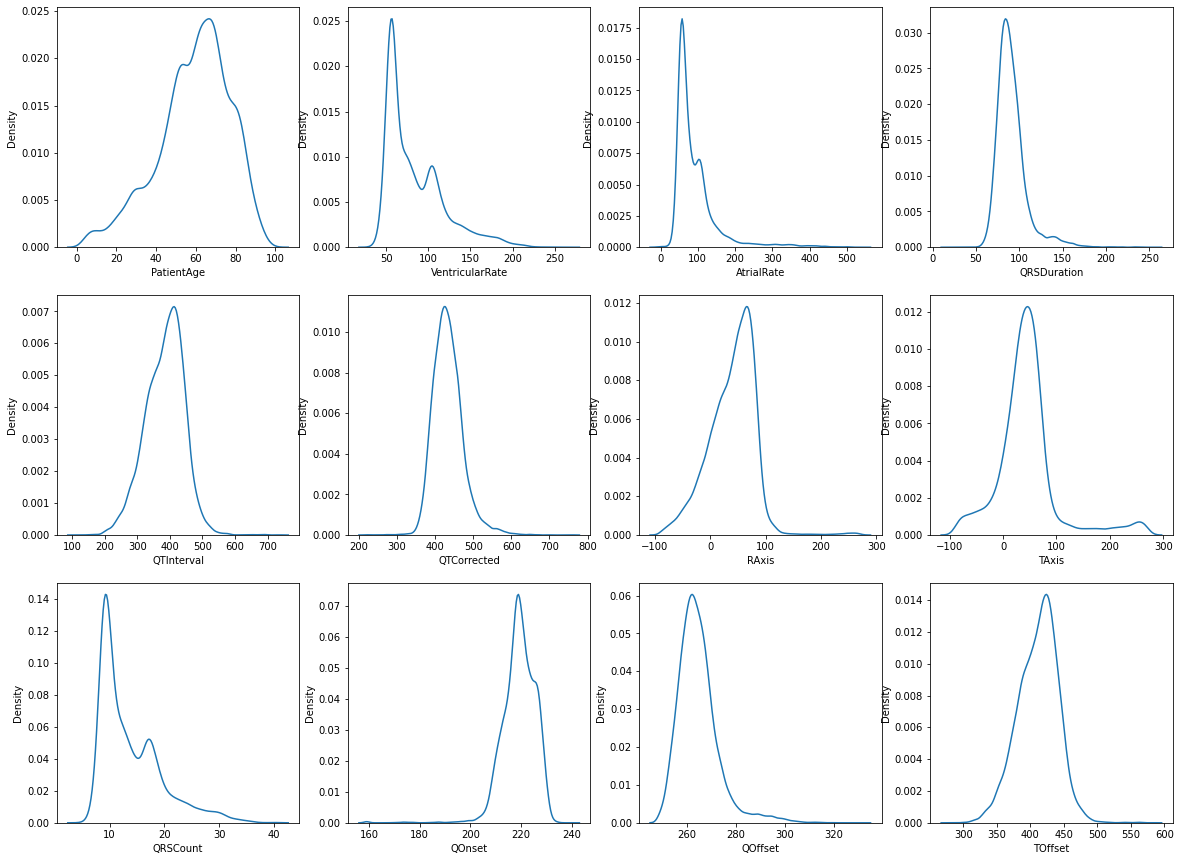

In [21]:
#verificando a distribuição de cada atributos
fig, ax = plt.subplots(3,4,figsize=(20,15))
sns.kdeplot(df_diagno['PatientAge'], ax=ax[0][0])
sns.kdeplot(df_diagno['VentricularRate'], ax=ax[0][1])
sns.kdeplot(df_diagno['AtrialRate'], ax=ax[0][2])
sns.kdeplot(df_diagno['QRSDuration'], ax=ax[0][3])
sns.kdeplot(df_diagno['QTInterval'], ax=ax[1][0])
sns.kdeplot(df_diagno['QTCorrected'], ax=ax[1][1])
sns.kdeplot(df_diagno['RAxis'], ax=ax[1][2])
sns.kdeplot(df_diagno['TAxis'], ax=ax[1][3])
sns.kdeplot(df_diagno['QRSCount'], ax=ax[2][0])
sns.kdeplot(df_diagno['QOnset'], ax=ax[2][1])
sns.kdeplot(df_diagno['QOffset'], ax=ax[2][2])
sns.kdeplot(df_diagno['TOffset'], ax=ax[2][3])


Percebe-se que a maioria dos atributos não apresentam uniformidade. 
Portanto, é indício que normalização deve ser utilizada na etapa de pré-processamento.

## Seleção de atributos <a id='8'></a>

Será utilizado duas abordagens para redução de dimensionalidade:

+ Atributos com alta correlação
+ Principal Component Analysis (PCA)


### Utilizando alta correlação

<AxesSubplot:>

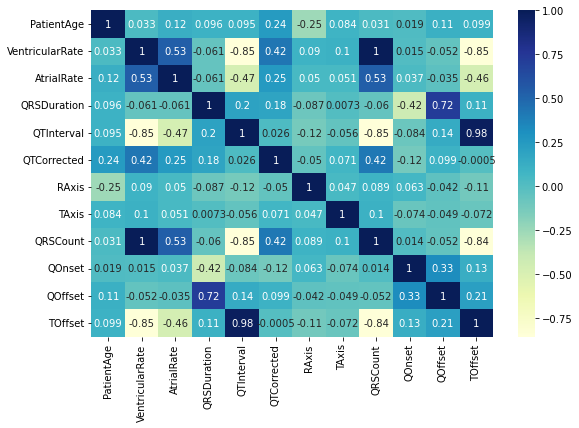

In [16]:
df_high_corr = df_diagno.drop(['Rhythm', 'Gender_FEMALE', 'Gender_MALE', 'Rhythm_grouped'], axis=1)
corr = df_high_corr.corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr,  annot=True,  cmap="YlGnBu")

Percebe-se que temos 03 pares de atributos correlacionados:

+ QRSCount e VentricularRate (correlação=1)
+ QOffset e QRSDuration (correlação=0.72)
+ TOffset e QTInterval (correlação=0.98)

Será testado dois conjuntos de dados: 

+ removendo atributos com correlação acima 0.7
+ removendo atributos com correlação acima 0.9 

<Figure size 648x432 with 0 Axes>

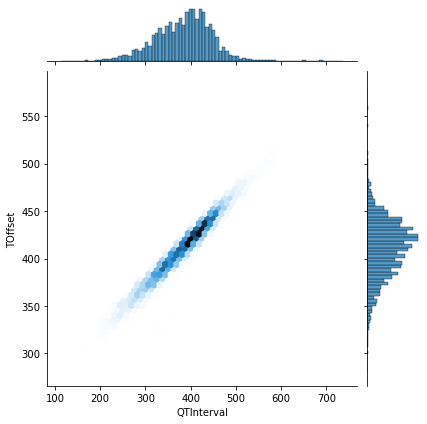

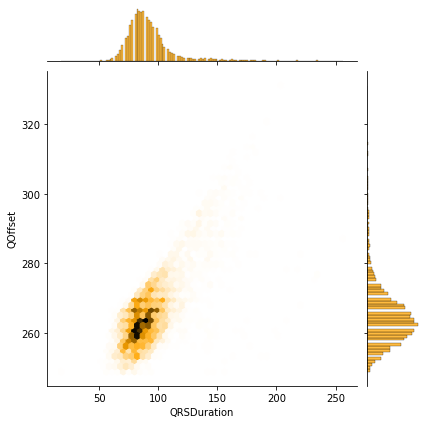

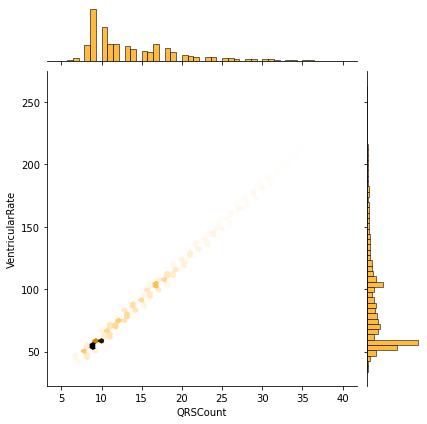

In [17]:
#verificando o tipo de correlaçao entre os atributos

plt.figure(figsize=(9,6))

sns.jointplot(x=df_high_corr['QTInterval'], y=df_high_corr['TOffset'], kind='hex')
sns.jointplot(x=df_high_corr['QRSDuration'], y=df_high_corr['QOffset'], kind='hex', color= 'orange')
sns.jointplot(x=df_high_corr['QRSCount'], y=df_high_corr['VentricularRate'], kind='hex', color= 'orange')

In [18]:
corr

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
PatientAge,1.000000,0.032591,0.122183,0.095572,0.095324,0.240528,-0.253885,0.084200,0.031155,0.019036,0.114108,0.098928
VentricularRate,0.032591,1.000000,0.534978,-0.061207,-0.853326,0.420913,0.089850,0.103677,0.997063,0.015197,-0.052137,-0.845736
AtrialRate,0.122183,0.534978,1.000000,-0.060675,-0.474870,0.253489,0.050196,0.050934,0.532142,0.037051,-0.034872,-0.464506
QRSDuration,0.095572,-0.061207,-0.060675,1.000000,0.199942,0.184334,-0.086648,0.007341,-0.060079,-0.420406,0.720199,0.108661
QTInterval,0.095324,-0.853326,-0.474870,0.199942,1.000000,0.025742,-0.122729,-0.056352,-0.850649,-0.084228,0.143867,0.976845
QTCorrected,0.240528,0.420913,0.253489,0.184334,0.025742,1.000000,-0.049739,0.071030,0.419796,-0.121601,0.099033,-0.000497
RAxis,-0.253885,0.089850,0.050196,-0.086648,-0.122729,-0.049739,1.000000,0.046725,0.089192,0.062722,-0.042298,-0.108640
TAxis,0.084200,0.103677,0.050934,0.007341,-0.056352,0.071030,0.046725,1.000000,0.103244,-0.073589,-0.048621,-0.071867
QRSCount,0.031155,0.997063,0.532142,-0.060079,-0.850649,0.419796,0.089192,0.103244,1.000000,0.013943,-0.051921,-0.843342
QOnset,0.019036,0.015197,0.037051,-0.420406,-0.084228,-0.121601,0.062722,-0.073589,0.013943,1.000000,0.326704,0.130912


In [19]:
#removendo atributos com correlação acima 0.7
col=np.full(corr.shape[0], True, dtype=bool) #array of True's

for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
                col[j] = False
                col[i] = False

df_diagno_high_corr_07 = df_diagno.drop(df_high_corr.columns[~col], axis=1)

In [20]:
df_diagno_high_corr_07

,Rhythm,PatientAge,AtrialRate,QTCorrected,RAxis,TAxis,QOnset,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,AFIB,85,234,496,81,-27,208,0,1,AFIB
1,SB,59,52,401,76,42,215,1,0,SB
2,SA,20,67,403,88,20,224,1,0,GSVT
3,SB,66,53,427,34,3,219,0,1,SB
4,AF,73,162,413,68,-40,228,1,0,AFIB
...,...,...,...,...,...,...,...,...,...,...
10641,SVT,80,73,513,258,244,177,1,0,GSVT
10642,SVT,81,81,482,110,-75,173,1,0,GSVT
10643,SVT,39,92,540,250,38,208,0,1,GSVT
10644,SVT,76,178,529,98,-83,205,0,1,GSVT


In [21]:
#removendo atributos com correlação acima 0.9
col=np.full(corr.shape[0], True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
                col[j] = False
                col[i] = False

df_diagno_high_corr_09 = df_diagno.drop(df_high_corr.columns[~col], axis=1)

In [22]:
df_diagno_high_corr_09

,Rhythm,PatientAge,AtrialRate,QRSDuration,QTCorrected,RAxis,TAxis,QOnset,QOffset,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,AFIB,85,234,114,496,81,-27,208,265,0,1,AFIB
1,SB,59,52,92,401,76,42,215,261,1,0,SB
2,SA,20,67,82,403,88,20,224,265,1,0,GSVT
3,SB,66,53,96,427,34,3,219,267,0,1,SB
4,AF,73,162,114,413,68,-40,228,285,1,0,AFIB
...,...,...,...,...,...,...,...,...,...,...,...,...
10641,SVT,80,73,168,513,258,244,177,261,1,0,GSVT
10642,SVT,81,81,162,482,110,-75,173,254,1,0,GSVT
10643,SVT,39,92,152,540,250,38,208,284,0,1,GSVT
10644,SVT,76,178,128,529,98,-83,205,269,0,1,GSVT


### Utilizando Principal Component Analysis (PCA)

Primeiro, verifico utilizando o sklearn e depois utilizando o pca manual (passo-a-passo)

PCA é usado para identificar componentes (atributos) com maior variância e a contribuição de cada variável para um componente é baseada em sua magnitude de variância. Os componentes selecionados irão representar a maior variabilidade o conjunto original com um menor número de atributos.

A diferença entre os dois métodos (sklearn e manual) é que o método do sklearn é preciso configurar o número de componentes que quer manter e o retorno não é possível saber quais atributos originais foram mantidos. No método manual é possível saber o impacto de cada atributo e posteriormente escolher quais irão ser mantidos. 

No método PCA do sklearn será utilizado o `n_components=.95`. Isso significa que o algoritmo irá  selecionar o número de componentes enquanto preserva 95% da variabilidade dos dados. Para a normalização, será utilizado o `StandardScaler()`, o qual permite deixar o conjunto de dados com média=0 e desvio padrão=1.

#### PCA Sklearn

In [23]:
scaler = StandardScaler()


In [24]:
def pca_sklearn(df, n_feat):
    
    #scaling data with mean = 0 and variance = 1
    features_scaled = scaler.fit_transform(df)

    #applying PCA of sklearn
    #choose 6 features to reduce features by half
    pca = PCA(n_components=n_feat)
    pca.fit(features_scaled)
    features_pca = pca.transform(features_scaled)

    #print the amount of information or variance each principal component holds
    print(f'Variance: {pca.explained_variance_ratio_}')

    #convert the PCA results into dataframe
    df_diagno_pca_skl = pd.DataFrame(data=features_pca, columns=['Comp_'+ str(i+1) for i in range(features_pca.shape[1])])

    #concatenate the pcaDataframe with remaining features
    df_diagno_pca_sklearn = pd.concat([df_diagno_pca_skl, df_diagno[['Rhythm', 'Gender_FEMALE', 'Gender_MALE', 'Rhythm_grouped']]], axis=1)
    df_diagno_pca_sklearn.dropna(inplace=True)
    
    return df_diagno_pca_sklearn,pca

In [25]:
df_diagno_pca_sklearn, pca = pca_sklearn(df_high_corr,0.95)

Variance: [0.34576105 0.1623097  0.11201229 0.10642524 0.08494252 0.07651752
 0.05686102 0.04927323]


Observe que 8 atributos foram considerados relevantes para manter 95% da variabilidade dos dados. Logo, os mesmos serão mantidos

In [26]:
df_diagno_pca_sklearn

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Rhythm,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,2.322675,2.230151,1.088563,0.314980,-0.454313,-1.876720,2.177637,0.286494,AFIB,0.0,1.0,AFIB
1,-1.830339,-0.756975,0.535013,0.717856,0.371702,-0.120658,0.770567,-0.352619,SB,1.0,0.0,SB
2,-0.649498,-1.812260,-1.287448,1.450053,0.374817,-0.547805,-0.536039,0.457937,SA,1.0,0.0,GSVT
3,-2.258633,0.325983,-0.076237,-0.187010,-0.356633,-0.449343,0.216287,-0.233429,SB,0.0,1.0,SB
4,3.896816,1.828984,-3.163403,0.824594,-1.247214,0.366689,1.034365,-0.834943,AF,1.0,0.0,AFIB
...,...,...,...,...,...,...,...,...,...,...,...,...
10626,3.924814,-0.650278,-0.401380,1.274241,-0.519795,-0.461805,-0.277611,0.141187,SVT,0.0,1.0,GSVT
10628,4.147729,3.294407,5.384527,4.986256,-2.204168,-1.888503,2.379029,-2.690484,SVT,1.0,0.0,GSVT
10629,2.951304,3.538148,-0.795624,4.774946,2.867077,-3.016260,0.670209,-1.618935,SVT,0.0,1.0,GSVT
10630,4.397940,3.188710,0.833435,1.580174,-1.070859,-2.771577,1.145235,-1.099010,SVT,0.0,1.0,GSVT


#### PCA manual

In [27]:
def pca_manual(df):

    df_features = (df-df.mean())/df.std()

    #correlation of features
    correlation = df_features.corr()

    #calculating eigenvalues and eigenvectors
    eigenvalues, eigenvectors = LA.eig(correlation)

    #calculating principal factors
    principal_factor = np.matmul(df_features,eigenvectors)

    #sum of square principal_factors
    sum_square_principal_factor = (principal_factor**2).sum()

    #sum total
    sum_total = sum_square_principal_factor.sum()

    #calculating importance of each features
    impact = sum_square_principal_factor/sum_total

    #convert to percentage
    impact = list(map(lambda x: x*100, impact))
    
    return impact

In [28]:
#verificando o impacto de cada atributo
impact = pca_manual(df_high_corr)
impact

[34.57610458923927,
 16.230969705340375,
 11.201229075052684,
 10.642524413114684,
 4.927322883065586,
 5.6861017529574145,
 7.6517519566397185,
 8.49425209202642,
 0.5657879327780817,
 0.02395559978577974,
 2.491256917533865e-26,
 1.7078271067581053e-26]

Observando o impacto de cada atributo, temos que os 8 primeiros atributos são mais relevantes, somando mais de 95%. Logo, os mesmos serão mantidos

In [29]:
df_diagno_pca_manual = pd.concat([df_high_corr[df_high_corr.columns[0:8]], df_diagno[['Rhythm', 'Gender_FEMALE', 'Gender_MALE', 'Rhythm_grouped']]], axis=1)
df_diagno_pca_manual

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,Rhythm,Gender_FEMALE,Gender_MALE,Rhythm_grouped
0,85,117,234,114,356,496,81,-27,AFIB,0,1,AFIB
1,59,52,52,92,432,401,76,42,SB,1,0,SB
2,20,67,67,82,382,403,88,20,SA,1,0,GSVT
3,66,53,53,96,456,427,34,3,SB,0,1,SB
4,73,162,162,114,252,413,68,-40,AF,1,0,AFIB
...,...,...,...,...,...,...,...,...,...,...,...,...
10641,80,196,73,168,284,513,258,244,SVT,1,0,GSVT
10642,81,162,81,162,294,482,110,-75,SVT,1,0,GSVT
10643,39,152,92,152,340,540,250,38,SVT,0,1,GSVT
10644,76,175,178,128,310,529,98,-83,SVT,0,1,GSVT


## Função para classificação <a id='9'></a> 

Na construção do modelo de classificação será utilizado o algoritmo RandomizedSearchCV que realiza a busca dos melhores hiperparâmetros de forma iterativa. Em conjunto será utilizado o Pipeline que consiste no pipeline do preprocessamento (normalização) e aplicação do modelo nos dados e cross validation para validação.

A configuração do RandomizedSearchCV permite a escolha de quais parâmetros serão analisados. Para isso, utilizei um dicionário `parameters` especificando as variáveis (C, kernel, gamma) para a busca. 

Testes iniciais mostraram que o kernel linear não classifica satisfatoriamente os dados. Uma explicação pode estar no fato de ser um problema multiclasse e vários atributos. Logo, um kernel não-linear pode ser mais promissor. Por isso, no modelo utilizado neste trabalho foi o `rbf kernel`. 

Ainda, é possível configurar um dicionário de métricas a serem analisados. Utilizei o dicionário `scores_` com as métricas acurácia, precisão, recall e f1. Para validação, utilizei 10-fold validation. No algoritmo RandomizedSearchCV, o _StratifiedKFold_ é o algoritmo padrão para validação, o qual mantém a proporção das classes entre os folds de treino e teste.

Após o processo de fitting, é possível retornar o melhor score (_best_score_), o melhor parâmetro (_best_params__) e todos os resultados das iterações do algoritmo.

In [17]:
def randomizedSearchCV(X,y):    

    #setting parameters
    parameters = {'C':np.arange(0.1,0.4,0.025), 'kernel':['rbf'], 'gamma':['scale','auto',0.1,0.2,0.3]}
    
    #pipeline to process features - standarlize
    feat_transformer = Pipeline(steps=[('standardScaler', StandardScaler())])

    #features to apply pre processing
    select_feat = list(X.columns)

    #compose pipelines
    preprocessor = ColumnTransformer(transformers=[
        ('features_trans', feat_transformer, select_feat)
    ])

    #creating model with pipeline 
    model = Pipeline(steps=[('processor', preprocessor),   
                            ('SVM', SVC())])

    #creating a dictionary of metrics
    scores_ = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
               'recall'   : metrics.make_scorer(metrics.recall_score, average='weighted', zero_division=0),
               'precision': metrics.make_scorer(metrics.precision_score, average='weighted', zero_division=0),
               'f1'       : metrics.make_scorer(metrics.fbeta_score, beta = 2, average='weighted' )} #beta >1 favors recall

    #instantiate the GridSearch with pipeline and parameters
    #the parameter *scoring* will calculate all metrics define in dictionary
    #the parameter *refit* will tell the grid which metrics will be used as best parameter
    #grid = GridSearchCV(model9, param_grid=parameters, cv=kfold_, n_jobs=-1, scoring=scores_, refit='f1')
    #the parameter *cv* use the StratifiedKFold (The folds are made by preserving the percentage of samples for each class.)
    grid_randomized = RandomizedSearchCV(model, 
                                         param_distributions=parameters, 
                                         n_iter=5, 
                                         cv=10, 
                                         n_jobs=-1,
                                         scoring=scores_, 
                                         refit='f1',
                                         return_train_score=True)

    #training the model using the training set
    #grid.fit(X_train_r_ages, y_train_r_ages)
    grid_randomized.fit(X, y)
    
    #taking the best F1 score
    #print(f'Best_score: {grid.best_score_}')
    print(f'Best_score: {grid_randomized.best_score_}')
    
    #taking the best score
    print(f'Best_param: {grid_randomized.best_params_}')
    
    results = pd.DataFrame(grid_randomized.cv_results_)[['params',
                                                         'mean_train_accuracy',
                                                         'mean_train_recall',
                                                         'mean_train_precision',
                                                         'mean_train_f1',
                                                         'mean_test_accuracy',
                                                         'mean_test_recall',
                                                         'mean_test_precision',
                                                         'mean_test_f1']].sort_values(by=['mean_test_f1'], ascending=False)  
    return results, grid_randomized

## Classificação com 11 classes <a id='10'></a>

In [40]:
#Split dataset into features set and target set
X_11 = df_diagno.drop(['Rhythm','Rhythm_grouped'], axis=1)  #selecting the features
y_11 = df_diagno['Rhythm']  #selecting the target

In [32]:
result, grid = randomizedSearchCV(X_11,y_11)

Best_score: 0.7771528599739173
Best_param: {'SVM__C': 0.2886822385012118, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [33]:
result

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
2,"{'SVM__C': 0.2886822385012118, 'SVM__gamma': '...",0.801145,0.801145,0.792891,0.788379,0.790069,0.790069,0.759965,0.777153
3,"{'SVM__C': 0.1261399043627021, 'SVM__gamma': '...",0.783891,0.783891,0.765108,0.769701,0.775491,0.775491,0.736803,0.760986
0,"{'SVM__C': 0.05168874765851915, 'SVM__gamma': ...",0.759071,0.759071,0.725000,0.743429,0.755176,0.755176,0.703175,0.739384
4,"{'SVM__C': 0.013956571724036748, 'SVM__gamma':...",0.701478,0.701478,0.649175,0.680467,0.699025,0.699025,0.646265,0.677729
1,"{'SVM__C': 0.08348313808578102, 'SVM__gamma': ...",0.510513,0.510513,0.534344,0.461506,0.492851,0.492851,0.491893,0.440060


## Classificação com 04 classes <a id='11'></a>

In [41]:
X_04 = df_diagno.drop(['Rhythm','Rhythm_grouped'], axis=1)  #selecting the features
y_04 = df_diagno['Rhythm_grouped']  #selecting the target

In [35]:
result_04, grid_04 = randomizedSearchCV(X_04,y_04)

Best_score: 0.8203616284046594
Best_param: {'SVM__C': 0.2782860217345803, 'SVM__gamma': 'auto', 'SVM__kernel': 'rbf'}


In [36]:
result_04

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'SVM__C': 0.2782860217345803, 'SVM__gamma': '...",0.839019,0.839019,0.835122,0.837109,0.822427,0.822427,0.818074,0.820362
1,"{'SVM__C': 0.146503489085168, 'SVM__gamma': 'a...",0.828850,0.828850,0.824110,0.826702,0.813585,0.813585,0.808716,0.811318
3,"{'SVM__C': 0.10311370241934477, 'SVM__gamma': ...",0.819612,0.819612,0.814255,0.817287,0.806908,0.806908,0.802050,0.804533
4,"{'SVM__C': 0.2647301927744313, 'SVM__gamma': 1...",0.864989,0.864989,0.873691,0.863662,0.736638,0.736638,0.769903,0.730318
2,"{'SVM__C': 0.13655091796580512, 'SVM__gamma': ...",0.693263,0.693263,0.741763,0.674275,0.645978,0.645978,0.679515,0.621401


## Classificação com remoção de outliers do atributo `AGE` e com 04 classes <a id='12'></a>

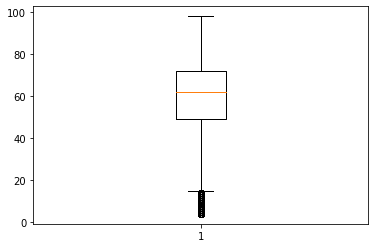

In [146]:
#analisando os outliers
a = plt.boxplot(df_diagno['PatientAge'])
plt.show()

In [38]:
#verificando o pontos limites do boxplot
[item.get_ydata() for item in a['whiskers']]

[array([49., 15.]), array([72., 98.])]

In [39]:
#contabilizando aa quantidade de outliers
len(df_diagno[df_diagno['PatientAge'] <= 15])

224

In [40]:
#criando um dataframe com a remoção dos outliers
df_diagno_remove_ages = df_diagno[df_diagno['PatientAge'] >= 15]

In [41]:
X_features_remove_ages = df_diagno_remove_ages.drop(['Rhythm','Rhythm_grouped'], axis=1)  #selecting the features
y_target_remove_ages = df_diagno_remove_ages['Rhythm_grouped']  #selecting the target with 04 classes

In [42]:
result_remove_ages, grid_remove_ages = randomizedSearchCV(X_features_remove_ages, y_target_remove_ages)

Best_score: 0.7951651277291479
Best_param: {'SVM__C': 0.07357391640392695, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [43]:
result_remove_ages

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.07357391640392695, 'SVM__gamma': ...",0.810648,0.810648,0.804663,0.808277,0.797705,0.797705,0.792923,0.795165
3,"{'SVM__C': 0.07090882448913301, 'SVM__gamma': ...",0.809935,0.809935,0.803922,0.807544,0.796651,0.796651,0.791751,0.794085
0,"{'SVM__C': 0.046651595218200524, 'SVM__gamma':...",0.801927,0.801927,0.796441,0.799689,0.785914,0.785914,0.782926,0.783214
1,"{'SVM__C': 0.2718874323348548, 'SVM__gamma': 1...",0.817069,0.817069,0.848845,0.814219,0.727441,0.727441,0.767650,0.718477
2,"{'SVM__C': 0.03476671083615688, 'SVM__gamma': ...",0.455912,0.455912,0.708184,0.388031,0.449918,0.449918,0.501765,0.379225


## Classificação com remoção do atributo `Gender` e com 04 classes <a id='13'></a>

In [44]:
result_remove_gender, grid_remove_gender = randomizedSearchCV(X_04.drop(['Gender_MALE','Gender_MALE'],axis=1),y_04)

Best_score: 0.8248197619694098
Best_param: {'SVM__C': 0.2992091374801783, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [45]:
result_remove_gender

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
1,"{'SVM__C': 0.2992091374801783, 'SVM__gamma': '...",0.841851,0.841851,0.838157,0.840015,0.826753,0.826753,0.822873,0.824820
2,"{'SVM__C': 0.18238558537641136, 'SVM__gamma': ...",0.837482,0.837482,0.833336,0.835701,0.820075,0.820075,0.816320,0.818161
3,"{'SVM__C': 0.1603830373749308, 'SVM__gamma': '...",0.832006,0.832006,0.827468,0.829959,0.818382,0.818382,0.813857,0.816254
4,"{'SVM__C': 0.11467610559485146, 'SVM__gamma': ...",0.825213,0.825213,0.820210,0.823064,0.812081,0.812081,0.807409,0.809848
0,"{'SVM__C': 0.05574682325974247, 'SVM__gamma': ...",0.625637,0.625637,0.658063,0.579953,0.611271,0.611271,0.650708,0.565469


## Classificação com remoção do atributo `Gender`, dos outliers do atributo `Age` e com 04 classes <a id='14'></a>

In [46]:
result_remove_gender_ages, grid_remove_gender_ages = randomizedSearchCV(X_features_remove_ages.drop(['Gender_MALE','Gender_MALE'],axis=1),
                                                                        y_target_remove_ages)

Best_score: 0.819815770691768
Best_param: {'SVM__C': 0.26152196010965073, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [47]:
result_remove_gender_ages

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.26152196010965073, 'SVM__gamma': ...",0.842208,0.842208,0.838700,0.840563,0.821662,0.821662,0.818244,0.819816
0,"{'SVM__C': 0.1406046122180117, 'SVM__gamma': 0...",0.830144,0.830144,0.825561,0.828399,0.813228,0.813228,0.809496,0.811221
1,"{'SVM__C': 0.04045780473579249, 'SVM__gamma': ...",0.800969,0.800969,0.795402,0.798710,0.785531,0.785531,0.782633,0.782743
3,"{'SVM__C': 0.2845894397058367, 'SVM__gamma': 1...",0.821243,0.821243,0.851637,0.818463,0.730508,0.730508,0.769429,0.721665
2,"{'SVM__C': 0.11817732578095635, 'SVM__gamma': ...",0.741829,0.741829,0.778222,0.730218,0.655878,0.655878,0.696517,0.639774


## Classificação com a seleção de atributos (alta correlação > 0.7) e com 04 classes <a id='15'></a>

In [48]:
X_feat_selection_07 = df_diagno_high_corr_07.drop(['Rhythm','Rhythm_grouped'],axis=1)
y_target_07 = df_diagno_high_corr_07['Rhythm_grouped']

In [49]:
result_feat_selection_07, grid_feat_selection_07 = randomizedSearchCV(X_feat_selection_07, y_target_07)

Best_score: 0.7418827723660151
Best_param: {'SVM__C': 0.23549911185861563, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [50]:
result_feat_selection_07

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'SVM__C': 0.23549911185861563, 'SVM__gamma': ...",0.764600,0.764600,0.763806,0.759287,0.748213,0.748213,0.749234,0.741883
1,"{'SVM__C': 0.1325850932616812, 'SVM__gamma': '...",0.747816,0.747816,0.750373,0.740516,0.734197,0.734197,0.738773,0.725742
2,"{'SVM__C': 0.25235785706688524, 'SVM__gamma': ...",0.778917,0.778917,0.787044,0.774673,0.727611,0.727611,0.739421,0.720707
3,"{'SVM__C': 0.06424152564054278, 'SVM__gamma': ...",0.714896,0.714896,0.719826,0.702995,0.704380,0.704380,0.709183,0.691493
4,"{'SVM__C': 0.13299721511553597, 'SVM__gamma': ...",0.732830,0.732830,0.750414,0.724751,0.696007,0.696007,0.714258,0.685011


## Classificação com a seleção de atributos (alta correlação > 0.7), remoção da atributo `Gender` e com 04 classes<a id='16'></a>

In [51]:
result_feat_selection_07_remove_gender, grid_feat_selection_07_remove_gender = randomizedSearchCV(X_feat_selection_07.drop(['Gender_MALE','Gender_MALE'],axis=1),
                                                                                                  y_target_07)

Best_score: 0.7570286761761608
Best_param: {'SVM__C': 0.26286773478398023, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [52]:
result_feat_selection_07_remove_gender

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'SVM__C': 0.26286773478398023, 'SVM__gamma': ...",0.778415,0.778415,0.776351,0.774355,0.762039,0.762039,0.761997,0.757029
4,"{'SVM__C': 0.23888526607181818, 'SVM__gamma': ...",0.775217,0.775217,0.784021,0.770764,0.726200,0.726200,0.738816,0.719048
3,"{'SVM__C': 0.18117204312482513, 'SVM__gamma': ...",0.756364,0.756364,0.769265,0.750477,0.713220,0.713220,0.728131,0.704519
1,"{'SVM__C': 0.08981390569666482, 'SVM__gamma': ...",0.710152,0.710152,0.730994,0.698955,0.677948,0.677948,0.700271,0.664107
2,"{'SVM__C': 0.009394766296007773, 'SVM__gamma':...",0.641125,0.641125,0.533964,0.610481,0.635813,0.635813,0.530094,0.604598


## Classificação com a seleção de atributos (alta correlação > 0.7), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes<a id='17'></a>

In [53]:
#criando o dataframe com remoção dos outliers do atributo Age
df_diagno_high_corr_07_remove_ages = df_diagno_high_corr_07[df_diagno_high_corr_07['PatientAge'] >= 15]

X_feat_selection_07_remove_gender_ages = df_diagno_high_corr_07_remove_ages.drop(['Rhythm','Rhythm_grouped','Gender_MALE','Gender_MALE'],axis=1)
y_target_07_remove_gender_ages = df_diagno_high_corr_07_remove_ages['Rhythm_grouped']

In [54]:
result_feat_selection_07_remove_gender_ages, grid_feat_selection_07_remove_gender_ages = randomizedSearchCV(X_feat_selection_07_remove_gender_ages,
                                                                                                            y_target_07_remove_gender_ages)  

Best_score: 0.736943089219029
Best_param: {'SVM__C': 0.16522945591506571, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [55]:
result_feat_selection_07_remove_gender_ages

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.16522945591506571, 'SVM__gamma': ...",0.758824,0.758824,0.758429,0.753091,0.743647,0.743647,0.744925,0.736943
3,"{'SVM__C': 0.04827747655884444, 'SVM__gamma': ...",0.703721,0.703721,0.709398,0.690417,0.694770,0.694770,0.700341,0.680581
0,"{'SVM__C': 0.02096207496307698, 'SVM__gamma': ...",0.658542,0.658542,0.658753,0.632704,0.651935,0.651935,0.647966,0.625525
2,"{'SVM__C': 0.019714893982140602, 'SVM__gamma':...",0.655039,0.655039,0.649650,0.627960,0.648868,0.648868,0.637173,0.621428
1,"{'SVM__C': 0.009057667052143803, 'SVM__gamma':...",0.633733,0.633733,0.526725,0.601774,0.629894,0.629894,0.523886,0.597386


## Classificação com a seleção de atributos (alta correlação > 0.9) e com 04 classes <a id='18'></a>

In [56]:
X_feat_selection_09 = df_diagno_high_corr_09.drop(['Rhythm','Rhythm_grouped'],axis=1)
y_target_09 = df_diagno_high_corr_09['Rhythm_grouped']

In [57]:
result_feat_selection_09, grid_feat_selection_09 = randomizedSearchCV(X_feat_selection_09, y_target_09)

Best_score: 0.7498519429535655
Best_param: {'SVM__C': 0.29863423289783614, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [58]:
result_feat_selection_09

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.29863423289783614, 'SVM__gamma': ...",0.775364,0.775364,0.774270,0.770675,0.755643,0.755643,0.756808,0.749852
0,"{'SVM__C': 0.1918865524096028, 'SVM__gamma': '...",0.759165,0.759165,0.759783,0.752985,0.742663,0.742663,0.745751,0.735342
1,"{'SVM__C': 0.15835624832088913, 'SVM__gamma': ...",0.752863,0.752863,0.754452,0.746057,0.737396,0.737396,0.741769,0.729426
2,"{'SVM__C': 0.13800170060806236, 'SVM__gamma': ...",0.746708,0.746708,0.749058,0.739216,0.730905,0.730905,0.734924,0.722175
3,"{'SVM__C': 0.07607533249262588, 'SVM__gamma': ...",0.606931,0.606931,0.670836,0.566668,0.580703,0.580703,0.617033,0.537743


## Classificação com a seleção de atributos (alta correlação > 0.9), remoção da atributo `Gender` e com 04 classes<a id='19'></a>

In [59]:
result_feat_selection_09_remove_gender, grid_feat_selection_09_remove_gender = randomizedSearchCV(X_feat_selection_09.drop(['Gender_MALE','Gender_MALE'],axis=1),
                                                                                                  y_target_09)

Best_score: 0.7453251999368404
Best_param: {'SVM__C': 0.22265831078630827, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [60]:
result_feat_selection_09_remove_gender

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.22265831078630827, 'SVM__gamma': ...",0.769971,0.769971,0.769721,0.764899,0.751505,0.751505,0.753454,0.745325
1,"{'SVM__C': 0.17485043379998258, 'SVM__gamma': ...",0.761611,0.761611,0.762255,0.755742,0.744356,0.744356,0.747436,0.737301
2,"{'SVM__C': 0.2798166220495745, 'SVM__gamma': 1...",0.771173,0.771173,0.788038,0.765288,0.692434,0.692434,0.714903,0.682656
3,"{'SVM__C': 0.2402958958904567, 'SVM__gamma': 1...",0.756835,0.756835,0.777095,0.749948,0.686320,0.686320,0.710561,0.675306
0,"{'SVM__C': 0.14204510259554817, 'SVM__gamma': ...",0.732475,0.732475,0.752233,0.720997,0.659231,0.659231,0.686378,0.644275


## Classificação com a seleção de atributos (alta correlação > 0.9), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes<a id='20'></a>

In [61]:
#criando o dataframe com remoção dos outliers do atributo Age
df_diagno_high_corr_09_remove_ages = df_diagno_high_corr_09[df_diagno_high_corr_09['PatientAge'] >= 15]

X_feat_selection_09_remove_gender_ages = df_diagno_high_corr_09_remove_ages.drop(['Rhythm','Rhythm_grouped','Gender_MALE','Gender_MALE'],axis=1)
y_target_09_remove_gender_ages = df_diagno_high_corr_09_remove_ages['Rhythm_grouped']

In [62]:
result_feat_selection_09_remove_gender_ages, grid_feat_selection_09_remove_gender_ages = randomizedSearchCV(X_feat_selection_09_remove_gender_ages,
                                                                                                            y_target_09_remove_gender_ages)  

Best_score: 0.7507343418801837
Best_param: {'SVM__C': 0.27443696219477576, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [63]:
result_feat_selection_09_remove_gender_ages

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
4,"{'SVM__C': 0.27443696219477576, 'SVM__gamma': ...",0.775361,0.775361,0.774007,0.770847,0.756202,0.756202,0.756872,0.750734
1,"{'SVM__C': 0.14129588174117189, 'SVM__gamma': ...",0.751201,0.751201,0.752388,0.744483,0.736266,0.736266,0.739921,0.728324
2,"{'SVM__C': 0.1240175532087151, 'SVM__gamma': 0...",0.743992,0.743992,0.745741,0.736422,0.729845,0.729845,0.733540,0.720997
0,"{'SVM__C': 0.10780049868594006, 'SVM__gamma': ...",0.738210,0.738210,0.740839,0.729981,0.723233,0.723233,0.727256,0.713623
3,"{'SVM__C': 0.29182774219428537, 'SVM__gamma': ...",0.760922,0.760922,0.782276,0.754049,0.687386,0.687386,0.710178,0.676259


## Classificação com seleção de atributos (PCA) e com 04 classes <a id='21'></a>  

In [64]:
X_feat_selection_pca = df_diagno_pca_manual.drop(['Rhythm','Rhythm_grouped'],axis=1)
y_target_pca = df_diagno_pca_manual['Rhythm_grouped']

In [65]:
result_feat_selection_pca, grid_feat_selection_pca = randomizedSearchCV(X_feat_selection_pca, y_target_pca)

Best_score: 0.8201993216377023
Best_param: {'SVM__C': 0.23858037476879446, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [66]:
result_feat_selection_pca

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'SVM__C': 0.23858037476879446, 'SVM__gamma': ...",0.836751,0.836751,0.832502,0.834830,0.822239,0.822239,0.817981,0.820199
2,"{'SVM__C': 0.19952483251821748, 'SVM__gamma': ...",0.834243,0.834243,0.829809,0.832264,0.820640,0.820640,0.816342,0.818622
4,"{'SVM__C': 0.18510954190756904, 'SVM__gamma': ...",0.832936,0.832936,0.828407,0.830947,0.820169,0.820169,0.815934,0.818188
1,"{'SVM__C': 0.05012763634633368, 'SVM__gamma': ...",0.804542,0.804542,0.799357,0.801914,0.789601,0.789601,0.786753,0.786791
3,"{'SVM__C': 0.008916525599490554, 'SVM__gamma':...",0.743103,0.743103,0.743630,0.734457,0.734857,0.734857,0.737968,0.725901


## Classificação com a seleção de atributos (PCA), remoção da atributo `Gender` e com 04 classes<a id='22'></a>

In [67]:
result_feat_selection_pca_remove_gender, grid_feat_selection_pca_remove_gender = randomizedSearchCV(X_feat_selection_pca.drop(['Gender_MALE','Gender_MALE'],axis=1),
                                                                                                    y_target_pca)

Best_score: 0.8180035803827227
Best_param: {'SVM__C': 0.17100283006798792, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [68]:
result_feat_selection_pca_remove_gender

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
2,"{'SVM__C': 0.17100283006798792, 'SVM__gamma': ...",0.832685,0.832685,0.828124,0.830675,0.820075,0.820075,0.815742,0.818004
4,"{'SVM__C': 0.15081534416052086, 'SVM__gamma': ...",0.830742,0.830742,0.826068,0.828734,0.816595,0.816595,0.812173,0.814539
0,"{'SVM__C': 0.11616082811370526, 'SVM__gamma': ...",0.827397,0.827397,0.822614,0.825396,0.814055,0.814055,0.810236,0.812091
1,"{'SVM__C': 0.03216249426977138, 'SVM__gamma': ...",0.796192,0.796192,0.791554,0.793341,0.782640,0.782640,0.780666,0.779503
3,"{'SVM__C': 0.10841212484230185, 'SVM__gamma': ...",0.789587,0.789587,0.813900,0.787453,0.747738,0.747738,0.774649,0.741055


## Classificação com a seleção de atributos (PCA), remoção da atributo `Gender`, remoção dos outliers do atributo `Age` e com 04 classes<a id='23'></a>

In [69]:
#criando o dataframe com remoção dos outliers do atributo Age
df_feat_selection_pca_remove_ages = df_diagno_pca_manual[df_diagno_pca_manual['PatientAge'] >= 15]

X_feat_selection_pca_remove_gender_ages = df_feat_selection_pca_remove_ages.drop(['Rhythm','Rhythm_grouped','Gender_MALE','Gender_MALE'],axis=1)
y_target_feat_selection_pca_remove_gender_ages = df_feat_selection_pca_remove_ages['Rhythm_grouped']

In [70]:
result_feat_selection_pca_remove_gender_ages, grid_feat_selection_pca_remove_gender_ages = randomizedSearchCV(X_feat_selection_pca_remove_gender_ages,
                                                                                                              y_target_feat_selection_pca_remove_gender_ages)  

Best_score: 0.8167289159589599
Best_param: {'SVM__C': 0.201296962366247, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [71]:
result_feat_selection_pca_remove_gender_ages

,params,mean_train_accuracy,mean_train_recall,mean_train_precision,mean_train_f1,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
3,"{'SVM__C': 0.201296962366247, 'SVM__gamma': 's...",0.834478,0.834478,0.830155,0.832690,0.818692,0.818692,0.814615,0.816729
2,"{'SVM__C': 0.09650521166276205, 'SVM__gamma': ...",0.820902,0.820902,0.815758,0.818933,0.807288,0.807288,0.803395,0.805168
0,"{'SVM__C': 0.2089849278215389, 'SVM__gamma': 1...",0.811862,0.811862,0.832826,0.809170,0.764241,0.764241,0.788440,0.757607
4,"{'SVM__C': 0.016457965063220236, 'SVM__gamma':...",0.768972,0.768972,0.766256,0.764489,0.760422,0.760422,0.760348,0.755464
1,"{'SVM__C': 0.024319834791619276, 'SVM__gamma':...",0.632604,0.632604,0.662494,0.591782,0.625783,0.625783,0.642900,0.584374


## Conclusão <a id='24'></a> 

Como comparativo, diversos testes foram realizados utilizando diferentes conjuntos de dados (atributos e classes).
Na construção do modelo foi utilizado o _RandomizedSearchCV_, algoritmo que realiza a busca pelos melhores hiperparâmetros de forma iterativa.
Dentre as métricas, F1-score será utilizada como métrica principal.

O conjunto de dados original tem 11 classes para classificação. O modelo neste cenário obteve F1-score de 78.8% para treino e 77.7% para teste. Devido a presença de várias classes minoritárias neste cenário, foi necessário a redução do número de classes. Como referência, utilizei a metodologia do artigo responsável pela base de dados. Os autores seguiram sugestões de cardiologistas, os quais sugeriraram a redução para 04 classes de acordo com semelhanças morfológicas entre as arritmias. 

No cenário de 04 classes, foi possível perceber uma melhora nos resultados. Com o conjunto de dados original, o modelo obteve 83% para treino e 81.6% para teste. Para investigar outras configurações, vários conjuntos de dados foram testados modificando o número de atributos, mas mantendo as 04 classes como objetivo de classificação. Abaixo, segue um resumo dos resultados:


| **TESTE** | **RESULTADOS** |
| :------------| :--------------|
|Remoção do outliers do atributo `AGE`|  83.3% treino e 81.7% teste|
|Remoção do atributo `Gender`| 83.5% treino e 82% teste|
|Remoção do atributo `Gender` e outliers do atributo `AGE`| 83.7% treino e 82.2% teste|
|Seleção de atributos (alta correlação > 0.7)| 75% treino e 73% teste|
|Seleção de atributos (alta correlação > 0.7) e remoção do atributo `Gender` | 77.6% treino e 75.7% teste|
|Seleção de atributos (alta correlação > 0.7), remoção do atributo `Gender` e remoção do outliers do atributo `AGE`  | 77% treino e 75.4% teste|
|Seleção de atributos (alta correlação > 0.9)| 76.8% treino e 74.8% teste|
|Seleção de atributos (alta correlação > 0.9) e remoção do atributo `Gender` | 76% treino e 74% teste|
|Seleção de atributos (alta correlação > 0.9), remoção do atributo `Gender` e remoção do outliers do atributo `AGE`  | 77% treino e 75% teste|
|Seleção de atributos (PCA)| 83.6% treino e 82% teste|
|***Seleção de atributos (PCA) e remoção do atributo `Gender`*** | ***84% treino e 82% teste***|
|Seleção de atributos (PCA), remoção do atributo `Gender` e remoção do outliers do atributo `AGE`  | 83.8% treino e 82% teste|

Como podemos observar, os resultados mostram sempre um melhor resultado para o conjunto de treino em relação ao conjunto de teste. Isso pode ser indício de `overfitting` do modelo.
Como melhor resultado, temos o modelo com seleção de atributos utilizando PCA e remoção do atributo `Gender`.

Novos testes serão investigados a fim de mitigar uma possível melhoria nos resultados. Como ponto de partida os próximos passos serão:

+ tratamento de classes desbalanceadas;
+ tratamento de outliers com  regressão linear;
+ reestruturação do modelo de classificação;
+ testes com outros SVM kernels não-lineares;
+ novos atributos do sinal;

# TRATAMENTOS PARA MELHORIA DE RESULTADOS

## Tratamento de outliers

Em relação ao tratamento de outliers, principalmente em relação ao atributo **PatientAge**, o mesmo não será realizado, devido que consta na descrição do conjunto de dados o intervalo de idade utilizado para aquisição dos dados, sendo de 4-98. Logo, os valores que apresentam ser outliers são apenas valores extremos dentro deste intervalo. Portanto, não justifica a remoção dos mesmos.

## Aplicando Discrete Wavelet Transform (DWT) para extração características

Estou utilizando DWT para extrair características do sinal com remoção de ruídos armazenados no diretório (**'../Datasets/ECGDataDenoised/'**).
A escolha deste tipo de extrator deu-se pela sua grande popularidade nos trabalhos presente na literatura. Adicionalmente, a DWT possui, comparado com Fourier Transform (técnica bastante popular também), alta resolução do domínio do tempo e da frequência, ou seja, não apenas diz quais frequências estão presentes no sinal com também em qual tempo essas frequências acontecem no tempo. Outro fator deu-se pela grande variedade de funções geradoras, chamadas de *mother wavelets*, que permitem extrair diferentes frequências a depender do tipo de sinal e do tipo de problema a ser estudado.

No meu caso, estou utilizando a função **db4** devido sua similaridade com a onda do pico R do sinal de ECG.
Para cada frequência gerada após a decomposição do sinal pela wavelet será extraído 12 características. As características escolhidas são as mais comum dentro do estudo de sinais de ECG, tais como percentis, entropias e crossings. Com isso, a **db4** gera 10 subfrequências de cada sinal, logo será extraído 10x12=120 características para cada sinal. Essas características são adicionadas às 18 características iniciais, totalizando 138 características para cada sinal.

['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


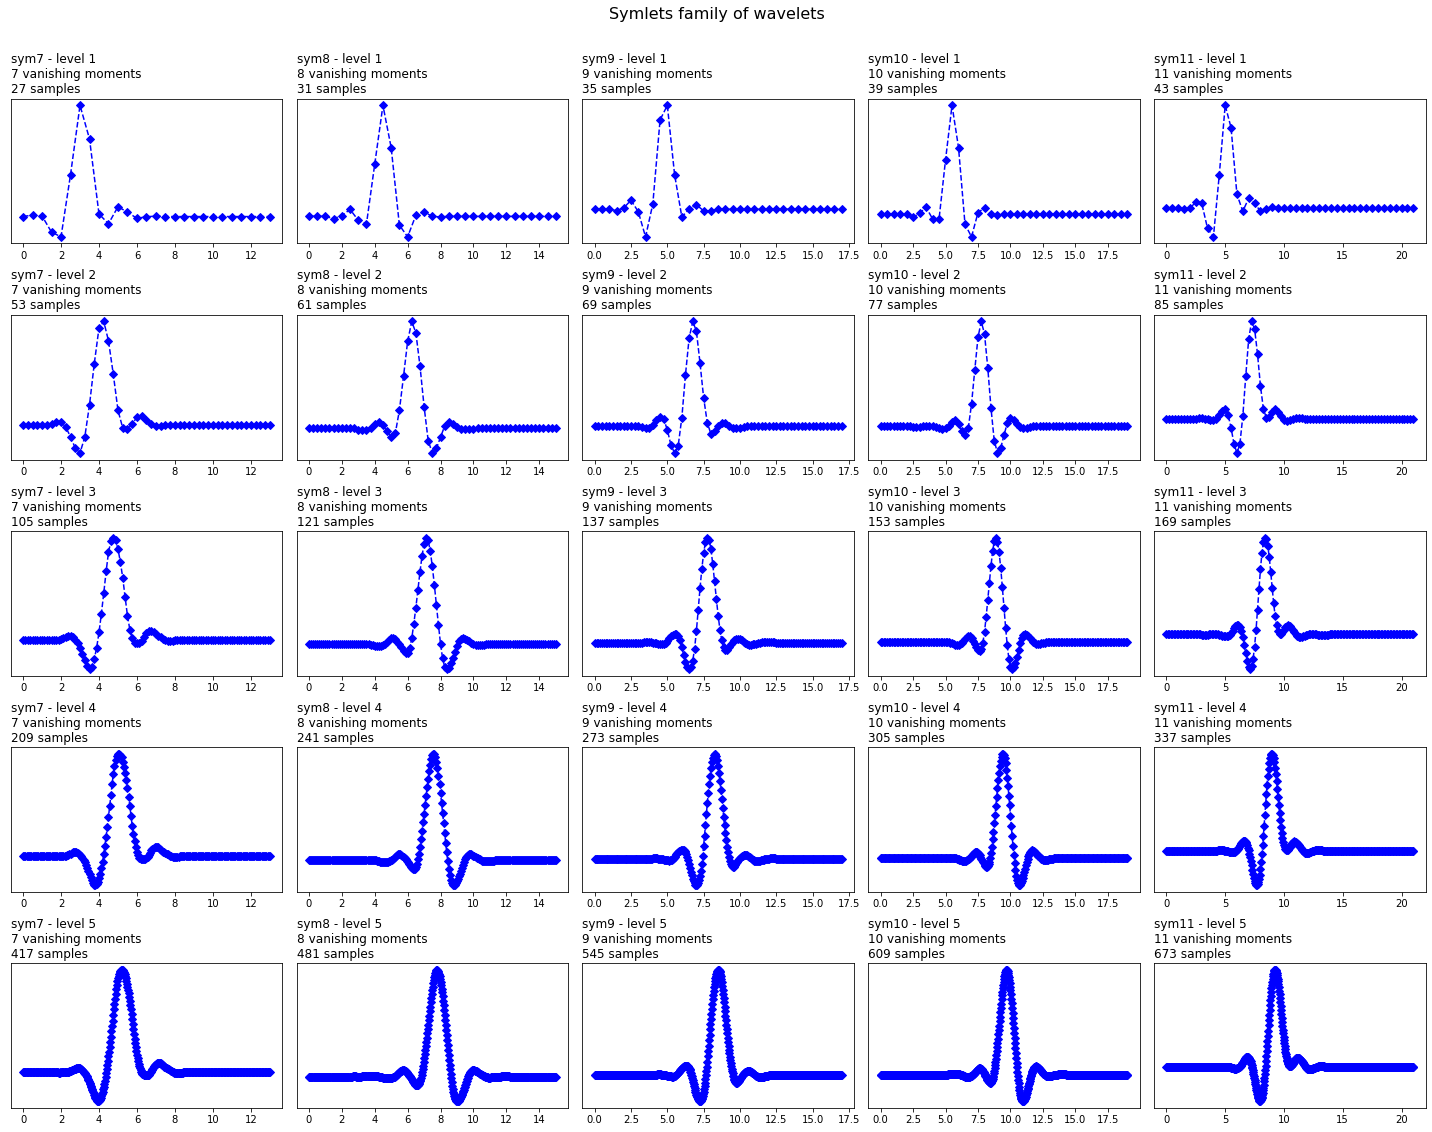

In [7]:
sym_wavelets = pywt.wavelist('sym')
print(sym_wavelets)
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Symlets family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(sym_wavelets[5:10]):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


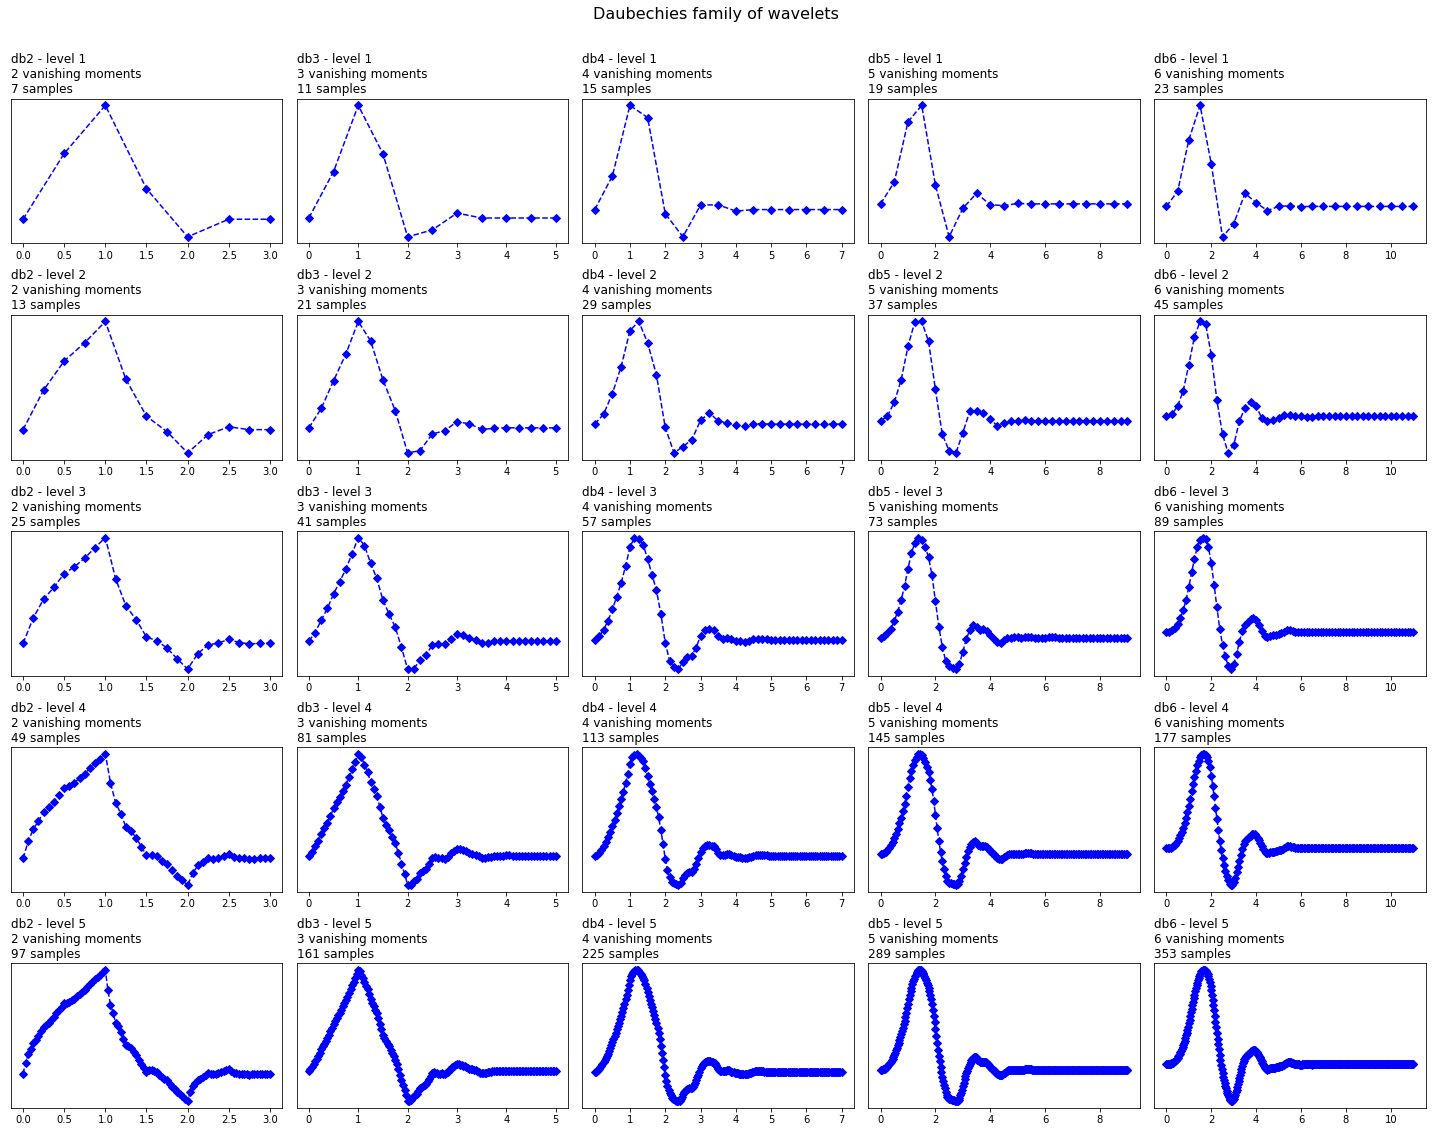

In [8]:
sym_wavelets = pywt.wavelist('db')
print(sym_wavelets)
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(sym_wavelets[1:6]):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [24]:
##entropy values can be taken as a measure of complexity of the signal.
def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=sp.stats.entropy(probabilities)
    return entropy

#values of percentiles
def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

#number of times a signal crosses y = 0
#number of times a signal crosses y = mean(y)
def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] + crossings + statistics

#aplica o extrator de características
def applying_dwt(path, list_files, wavelet):
    
    #lista auxiliar
    list_features=[]
        
    #percorre cada arquivo dos sinais
    for files in list_files:
        #lê o arquivo
        signal = pd.read_csv(path+files+'.csv', names=['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6'])
        #aplica a dwt para extrair coeficientes
        coeffs = pywt.wavedec(signal['II'], wavelet)
        
        #lista auxiliar
        features=[]
        
        #extrai as features de acordo com cada coeficiente da wavelet
        for coeff in coeffs:
            features += get_features(coeff)
        list_features.append(features)
    
    #converte todas as features em um dataframe
    df = pd.DataFrame(list_features, columns=['coef_'+str(i) for i in range(len(list_features[0]))])
    
    return df        

In [25]:
#aplicando a DWT
path = '../Datasets/ECGDataDenoised/'
df_features_dwt = applying_dwt(path,df_diagno['FileName'],'db4')

In [27]:
#concatenando as novas features no dataframe
df = pd.concat([df_diagno,df_features_dwt], axis=1)
df

,FileName,Rhythm,Beat,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,...,coef_110,coef_111,coef_112,coef_113,coef_114,coef_115,coef_116,coef_117,coef_118,coef_119
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,117,234,114,356,496,81,...,988.0,-0.371274,-0.058154,0.059193,0.350617,-0.001770,0.005623,0.526150,0.276834,0.162662
1,MUSE_20180112_073319_29000,SB,TWC,59,52,52,92,432,401,76,...,988.0,-0.148296,-0.039977,0.039154,0.157152,-0.001652,0.000237,0.328087,0.107641,0.112741
2,MUSE_20180111_165520_97000,SA,NONE,20,67,67,82,382,403,88,...,979.0,-0.215270,-0.027594,0.028979,0.283653,-0.000014,-0.009077,0.630040,0.396950,0.188139
3,MUSE_20180113_121940_44000,SB,NONE,66,53,53,96,456,427,34,...,1086.0,-0.190107,-0.019391,0.019222,0.189360,-0.000701,0.000932,0.369458,0.136499,0.119177
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,162,162,114,252,413,68,...,1072.0,-0.930889,-0.014683,0.018928,1.276607,0.001579,0.003045,1.260668,1.589285,0.406519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,196,73,168,284,513,258,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10642,MUSE_20181222_204309_22000,SVT,NONE,81,162,81,162,294,482,110,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10643,MUSE_20181222_204310_31000,SVT,NONE,39,152,92,152,340,540,250,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10644,MUSE_20181222_204312_58000,SVT,NONE,76,175,178,128,310,529,98,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#savando o dataframe
df.to_csv(os.path.abspath('../Datasets/df_features_dwt_db4.csv'),sep=',')

In [4]:
#lendo o dataframe
df = pd.read_csv(os.path.abspath('../Datasets/df_features_dwt_db4.csv'),sep=',', header=0, index_col=[0])

In [5]:
#removendo atributos desnecessários
#o nome dos arquivos, as 11 classes (porque o que interessa é o agrupamento em 04 classes) e os tipos de batimentos
#porque a classificação ocorre pela classes
df.drop(['FileName', 'Rhythm', 'Beat'], axis=1, inplace=True)

In [6]:
#verificando valores nulos
df.isnull().sum()

PatientAge         0
VentricularRate    0
AtrialRate         0
QRSDuration        0
QTInterval         0
                  ..
coef_115           1
coef_116           1
coef_117           1
coef_118           1
coef_119           1
Length: 135, dtype: int64

In [7]:
#filling the NaN values with 0
df.fillna(0,inplace=True)

In [8]:
X_dwt = df.drop(['Rhythm_grouped'], axis=1)  #selecionando as caracteristicas
y_dwt = df['Rhythm_grouped']  #selecionando o alvo

In [9]:
X_dwt.shape

(10646, 134)

In [10]:
#contabilizando as classes
Counter(y_dwt)

Counter({'AFIB': 2225, 'SB': 3889, 'GSVT': 2706, 'SR': 1826})

In [11]:
#separando em treino e teste
train_x,test_x,train_y,test_y = train_test_split(X_dwt,y_dwt,test_size=0.2,random_state=1,shuffle=True)

In [14]:
#contabilizando classes do conjunto de treinamento
Counter(train_y)

Counter({'SB': 3121, 'SR': 1454, 'AFIB': 1786, 'GSVT': 2155})

In [16]:
#contabilizando classes do conjunto de teste
Counter(test_y)

Counter({'AFIB': 439, 'SR': 372, 'SB': 768, 'GSVT': 551})

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(test_y)
encoded_test_y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_test_y = np_utils.to_categorical(encoded_test_y)

In [12]:
def gridSearchCV(X,y,type_grid):    

    #setting parameters
    parameters = {'SVM__C':np.arange(0.1,100,0.1), 'SVM__kernel':['rbf'], 'SVM__gamma':np.arange(0.01,10,0.01)}
    
    #pipeline to process features - standarlize
    feat_transformer = Pipeline(steps=[('minMaxScaler', MinMaxScaler())])

    #features to apply pre processing
    select_feat = list(X.columns)

    #compose pipelines
    preprocessor = ColumnTransformer(transformers=[
        ('features_trans', feat_transformer, select_feat)
    ])

    #creating model with pipeline 
    model = Pipeline(steps=[('processor', preprocessor),   
                            ('SVM', SVC())])
    
    #creating model with pipeline 
    #model = SVC()

    #creating a dictionary of metrics
    scores_ = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
               'recall'   : metrics.make_scorer(metrics.recall_score, average='weighted', zero_division=0),
               'precision': metrics.make_scorer(metrics.precision_score, average='weighted', zero_division=0),
               'f1'       : metrics.make_scorer(metrics.fbeta_score, beta = 2, average='weighted' )} #beta >1 favors recall

    #instantiate the GridSearch with pipeline and parameters
    #the parameter *scoring* will calculate all metrics define in dictionary
    #the parameter *refit* will tell the grid which metrics will be used as best parameter
    #the parameter *cv* use the StratifiedKFold (The folds are made by preserving the percentage of samples for each class.)
    if type_grid == 'grid':        
        grid = GridSearchCV(model,
                            param_grid=parameters, 
                            cv=10, 
                            n_jobs=-1, 
                            scoring=scores_, 
                            refit='f1',
                            return_train_score=True)
    else:
        grid = RandomizedSearchCV(model, 
                                  param_distributions=parameters, 
                                  n_iter=200, 
                                  cv=10, 
                                  n_jobs=-1,
                                  scoring=scores_, 
                                  refit='f1',
                                  return_train_score=True)

    #training the model using the training set
    grid.fit(X, y)
    
    #taking the best F1 score
    #print(f'Best_score: {grid.best_score_}')
    print(f'Best_score: {grid.best_score_}')
    
    #taking the best score
    print(f'Best_param: {grid.best_params_}')
    
    results = pd.DataFrame(grid.cv_results_)[['params',
                                                         'mean_train_accuracy',
                                                         'mean_train_recall',
                                                         'mean_train_precision',
                                                         'mean_train_f1',
                                                         'mean_test_accuracy',
                                                         'mean_test_recall',
                                                         'mean_test_precision',
                                                         'mean_test_f1']].sort_values(by=['mean_test_f1'], ascending=False)  
    return results, grid

In [13]:
# Compute ROC curve and ROC area for each class
def plot_roc_auc_curve(y_test, y_score_decision, classes, classifier):
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i, cls in enumerate(classes):
        fpr[cls], tpr[cls], _ = roc_curve(y_test[:, i], y_score_decision[:, i])
        roc_auc[cls] = auc(fpr[cls], tpr[cls])

    # Compute micro-average ROC curve and ROC area
    # ravel return a flatten array of dataframe
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score_decision.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(9,6))
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro média (área = {roc_auc["micro"]:.2f})', linewidth=4)
    
    for i in classes:
        plt.plot(fpr[i], tpr[i], label=f'Classe {i} (área = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Curva ROC '+ classifier)
    plt.legend(loc="lower right")
    plt.savefig(os.path.abspath('./images/roc_auc_'+classifier+'.pdf'), dpi=300)
    plt.show()

In [14]:
# Compute ROC curves for all classifiers
def plot_all_roc_auc_curves(y_test, y_score_decision, classifiers):
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    # ravel return a flatten array of dataframe    
    for decision, classifiers_ in zip(y_score_decision,classifiers):
        fpr[classifiers_], tpr[classifiers_], _ = roc_curve(y_test.ravel(), decision.ravel())
        roc_auc[classifiers_] = auc(fpr[classifiers_], tpr[classifiers_])

    # Plot ROC curve
    plt.figure(figsize=(12,8))
    
    for classifiers_ in classifiers:
        plt.plot(fpr[classifiers_], tpr[classifiers_], label=f'{classifiers_} (área = {roc_auc[classifiers_]:.2f})', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Comparativos de Curvas ROC')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.savefig(os.path.abspath('./images/roc_auc_all.pdf'), dpi=300)
    plt.show()

In [57]:
#aplicando o SVM
result_, grid_ = gridSearchCV(train_x,train_y,'random')

Best_score: 0.8698534535373721
Best_param: {'SVM__kernel': 'rbf', 'SVM__gamma': 0.2, 'SVM__C': 13.4}


In [283]:
#treinando o svm
train_score = grid_.score(train_x,train_y)
train_score

0.9144188232585314

In [284]:
#testando o svm
test_score = grid_.score(test_x, test_y)
test_score

0.8671582225347125

In [285]:
train_pred_svm = grid_.predict(train_x)
test_pred_svm = grid_.predict(test_x)

In [286]:
print(classification_report(train_y,train_pred_svm))

              precision    recall  f1-score   support

        AFIB       0.88      0.88      0.88      1786
        GSVT       0.91      0.86      0.89      2155
          SB       0.96      1.00      0.98      3121
          SR       0.86      0.87      0.86      1454

    accuracy                           0.91      8516
   macro avg       0.90      0.90      0.90      8516
weighted avg       0.91      0.91      0.91      8516



In [287]:
print(classification_report(test_y,test_pred_svm))

              precision    recall  f1-score   support

        AFIB       0.79      0.82      0.80       439
        GSVT       0.83      0.78      0.81       551
          SB       0.96      0.99      0.97       768
          SR       0.81      0.81      0.81       372

    accuracy                           0.87      2130
   macro avg       0.85      0.85      0.85      2130
weighted avg       0.87      0.87      0.87      2130



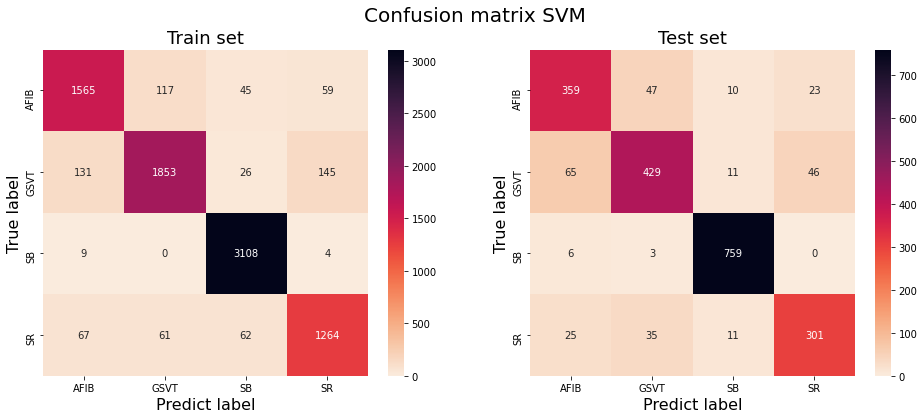

In [292]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train = confusion_matrix(train_y,train_pred_svm, labels=['AFIB','GSVT','SB','SR'])
matrix_test = confusion_matrix(test_y,test_pred_svm, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix SVM', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
plt.savefig(os.path.abspath('./images/confusion_svm.pdf'), dpi=300)

In [289]:
dec_funct_svm = grid_.decision_function(test_x)

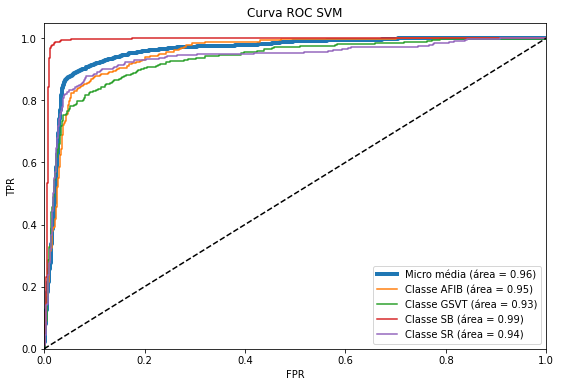

In [298]:
plot_roc_auc_curve(dummy_test_y, dec_funct_svm, list(grid_.classes_), 'SVM')

## Gradient Boosting Classifier

In [22]:
#testando o Gradient Boosting
grd = GradientBoostingClassifier(n_estimators=500)
scv =  StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scores_ = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
           'recall'   : metrics.make_scorer(metrics.recall_score, average='weighted', zero_division=0),
           'precision': metrics.make_scorer(metrics.precision_score, average='weighted', zero_division=0),
           'f1'       : metrics.make_scorer(metrics.fbeta_score, beta = 2, average='weighted' )}
cvs = cross_validate(grd, 
                     train_x, 
                     train_y, 
                     scoring=scores_, 
                     cv=scv, 
                     n_jobs=-1,
                     return_train_score=True)

In [185]:
print('Metrics using 10-fold validation')
print(f"Accuracy: {cvs['test_accuracy'].mean():.2f}")
print(f"Recall: {cvs['test_recall'].mean():.2f}")
print(f"Accuracy: {cvs['test_precision'].mean():.2f}")
print(f"Accuracy: {cvs['test_f1'].mean():.2f}")

Metrics using 10-fold validation
Accuracy: 0.91
Recall: 0.91
Accuracy: 0.91
Accuracy: 0.91


In [186]:
grd.fit(train_x,train_y)

GradientBoostingClassifier(n_estimators=500)

In [73]:
train_pred_grd = grd.predict(train_x)
test_pred_grd = grd.predict(test_x)

In [74]:
print(classification_report(train_y, train_pred_grd))

              precision    recall  f1-score   support

        AFIB       1.00      1.00      1.00      1786
        GSVT       1.00      1.00      1.00      2155
          SB       1.00      1.00      1.00      3121
          SR       1.00      1.00      1.00      1454

    accuracy                           1.00      8516
   macro avg       1.00      1.00      1.00      8516
weighted avg       1.00      1.00      1.00      8516



In [75]:
print(classification_report(test_y, test_pred_grd))

              precision    recall  f1-score   support

        AFIB       0.85      0.85      0.85       439
        GSVT       0.89      0.83      0.86       551
          SB       0.98      0.99      0.99       768
          SR       0.83      0.91      0.87       372

    accuracy                           0.91      2130
   macro avg       0.89      0.89      0.89      2130
weighted avg       0.91      0.91      0.91      2130



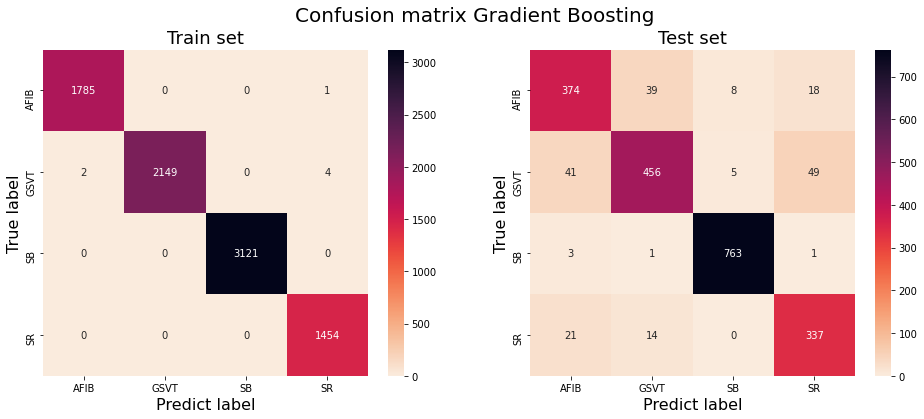

In [300]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train_grd = confusion_matrix(train_y, train_pred_grd, labels=['AFIB','GSVT','SB','SR'])
matrix_test_grd = confusion_matrix(test_y, test_pred_grd, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train_grd, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test_grd, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix Gradient Boosting', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
plt.savefig(os.path.abspath('./images/confusion_gradient_boosting.pdf'), dpi=300)

In [187]:
dec_funct_grd = grd.decision_function(test_x)

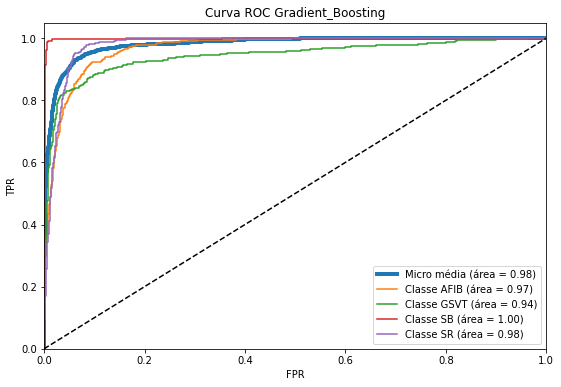

In [301]:
plot_roc_auc_curve(dummy_test_y, dec_funct_grd, list(grd.classes_), 'Gradient_Boosting')

## AdaBoost Classifier

In [203]:
clf = AdaBoostClassifier(n_estimators=500, random_state=1)
clf_result = cross_validate(clf, 
                            train_x, 
                            train_y, 
                            scoring=scores_, 
                            cv=scv, 
                            n_jobs=-1,
                            return_train_score=True)

In [204]:
print('Metrics using 10-fold validation')
print(f"Accuracy: {clf_result['test_accuracy'].mean():.2f}")
print(f"Recall: {clf_result['test_recall'].mean():.2f}")
print(f"Accuracy: {clf_result['test_precision'].mean():.2f}")
print(f"Accuracy: {clf_result['test_f1'].mean():.2f}")

Metrics using 10-fold validation
Accuracy: 0.76
Recall: 0.76
Accuracy: 0.77
Accuracy: 0.76


In [205]:
clf.fit(train_x,train_y)

AdaBoostClassifier(n_estimators=500, random_state=1)

In [230]:
train_pred_clf = clf.predict(train_x)
test_pred_clf = clf.predict(test_x)

In [231]:
print(classification_report(train_y, train_pred_clf))

              precision    recall  f1-score   support

        AFIB       0.55      0.76      0.64      1786
        GSVT       0.68      0.50      0.58      2155
          SB       0.98      0.99      0.99      3121
          SR       0.71      0.64      0.67      1454

    accuracy                           0.76      8516
   macro avg       0.73      0.72      0.72      8516
weighted avg       0.77      0.76      0.76      8516



In [232]:
print(classification_report(test_y, test_pred_clf))

              precision    recall  f1-score   support

        AFIB       0.52      0.76      0.62       439
        GSVT       0.69      0.51      0.59       551
          SB       0.98      0.99      0.99       768
          SR       0.73      0.59      0.65       372

    accuracy                           0.75      2130
   macro avg       0.73      0.71      0.71      2130
weighted avg       0.77      0.75      0.75      2130



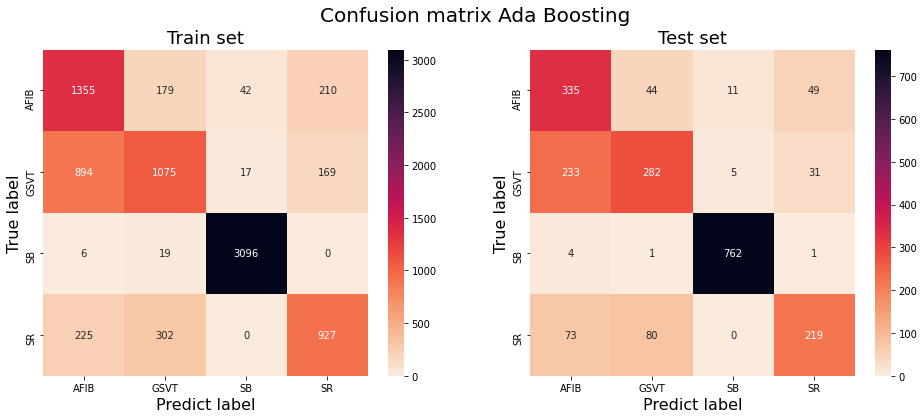

In [302]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train_clf = confusion_matrix(train_y, train_pred_clf, labels=['AFIB','GSVT','SB','SR'])
matrix_test_clf = confusion_matrix(test_y, test_pred_clf, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train_clf, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test_clf, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix Ada Boosting', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
plt.savefig(os.path.abspath('./images/confusion_ada_boosting.pdf'), dpi=300)

In [210]:
dec_funct_clf = clf.decision_function(test_x)

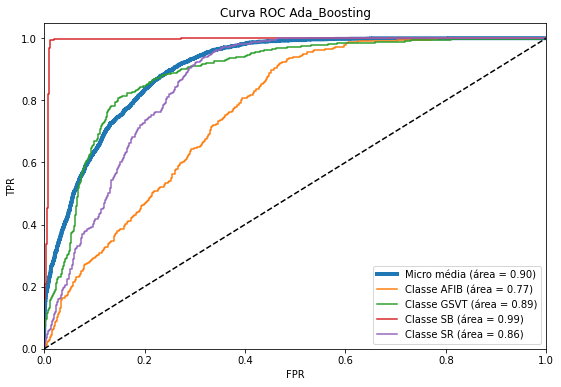

In [303]:
plot_roc_auc_curve(dummy_test_y, dec_funct_clf, list(clf.classes_), 'Ada_Boosting')

## Random Forest

In [239]:
randf = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1, random_state=1)
randf_result = cross_validate(randf, 
                              train_x, 
                              train_y, 
                              scoring=scores_, 
                              cv=scv, 
                              n_jobs=-1,
                              return_train_score=True)

In [240]:
print('Metrics using 10-fold validation')
print(f"Accuracy: {randf_result['test_accuracy'].mean():.2f}")
print(f"Recall: {randf_result['test_recall'].mean():.2f}")
print(f"Accuracy: {randf_result['test_precision'].mean():.2f}")
print(f"Accuracy: {randf_result['test_f1'].mean():.2f}")

Metrics using 10-fold validation
Accuracy: 0.88
Recall: 0.88
Accuracy: 0.88
Accuracy: 0.88


In [241]:
randf.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

In [242]:
train_pred_randf = randf.predict(train_x)
test_pred_randf = randf.predict(test_x)

In [243]:
print(classification_report(train_y, train_pred_randf))

              precision    recall  f1-score   support

        AFIB       1.00      1.00      1.00      1786
        GSVT       1.00      1.00      1.00      2155
          SB       1.00      1.00      1.00      3121
          SR       1.00      1.00      1.00      1454

    accuracy                           1.00      8516
   macro avg       1.00      1.00      1.00      8516
weighted avg       1.00      1.00      1.00      8516



In [244]:
print(classification_report(test_y, test_pred_randf))

              precision    recall  f1-score   support

        AFIB       0.83      0.76      0.79       439
        GSVT       0.87      0.80      0.84       551
          SB       0.97      0.99      0.98       768
          SR       0.78      0.92      0.84       372

    accuracy                           0.88      2130
   macro avg       0.86      0.87      0.86      2130
weighted avg       0.88      0.88      0.88      2130



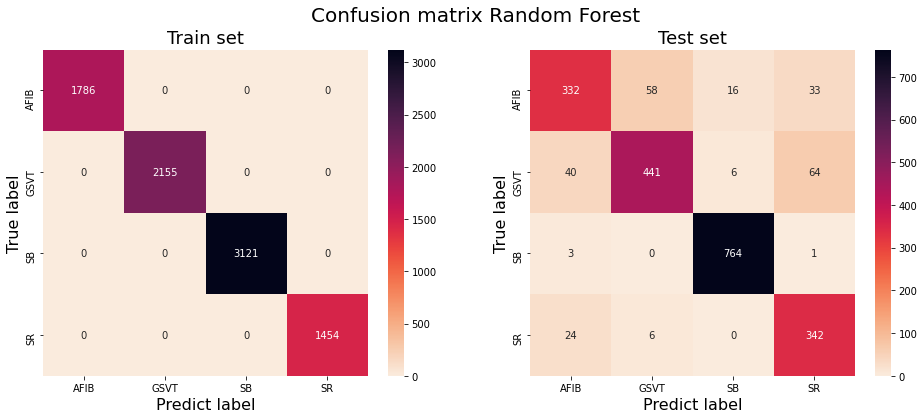

In [304]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train_randf = confusion_matrix(train_y, train_pred_randf, labels=['AFIB','GSVT','SB','SR'])
matrix_test_randf = confusion_matrix(test_y, test_pred_randf, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train_randf, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test_randf, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix Random Forest', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
plt.savefig(os.path.abspath('./images/confusion_random_forest.pdf'), dpi=300)

In [256]:
dec_funct_randf = randf.predict_proba(test_x)

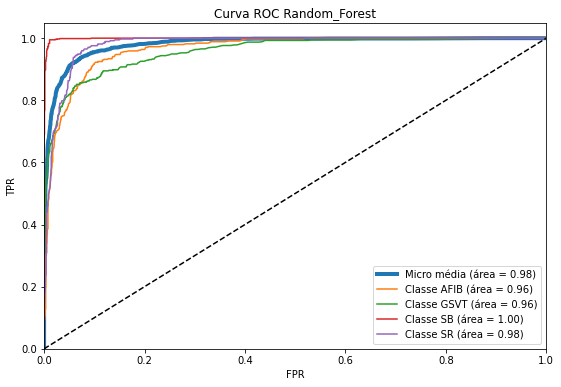

In [305]:
plot_roc_auc_curve(dummy_test_y, dec_funct_randf, list(randf.classes_), 'Random_Forest')

## Extreme Gradient Boosting Classifier

In [247]:
xgboost = xgb.XGBClassifier(n_estimator=500, random_state=1, n_jobs=-1, learning_rate=0.1)
xgboost_result = cross_validate(xgboost, 
                                train_x, 
                                train_y, 
                                scoring=scores_, 
                                cv=scv, 
                                n_jobs=-1,
                                return_train_score=True)

In [248]:
print('Metrics using 10-fold validation')
print(f"Accuracy: {xgboost_result['test_accuracy'].mean():.2f}")
print(f"Recall: {xgboost_result['test_recall'].mean():.2f}")
print(f"Accuracy: {xgboost_result['test_precision'].mean():.2f}")
print(f"Accuracy: {xgboost_result['test_f1'].mean():.2f}")

Metrics using 10-fold validation
Accuracy: 0.91
Recall: 0.91
Accuracy: 0.91
Accuracy: 0.91


In [249]:
xgboost.fit(train_x,train_y)

/media/share/comum/env/cisco/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:19] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=500, n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [251]:
train_pred_xgb = xgboost.predict(train_x)
test_pred_xgb = xgboost.predict(test_x)

In [252]:
print(classification_report(train_y, train_pred_xgb))

              precision    recall  f1-score   support

        AFIB       1.00      1.00      1.00      1786
        GSVT       1.00      0.98      0.99      2155
          SB       1.00      1.00      1.00      3121
          SR       0.97      1.00      0.98      1454

    accuracy                           0.99      8516
   macro avg       0.99      0.99      0.99      8516
weighted avg       0.99      0.99      0.99      8516



In [253]:
print(classification_report(test_y, test_pred_xgb))

              precision    recall  f1-score   support

        AFIB       0.85      0.82      0.84       439
        GSVT       0.89      0.83      0.86       551
          SB       0.98      0.99      0.99       768
          SR       0.81      0.91      0.86       372

    accuracy                           0.90      2130
   macro avg       0.88      0.89      0.89      2130
weighted avg       0.90      0.90      0.90      2130



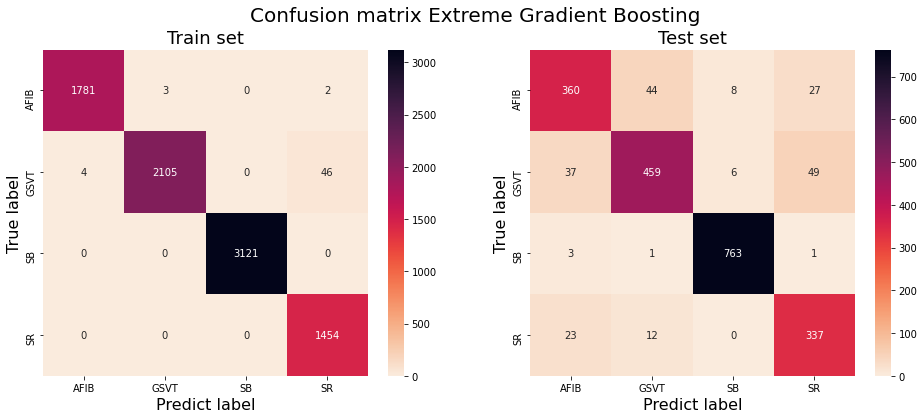

In [306]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train_xgb = confusion_matrix(train_y, train_pred_xgb, labels=['AFIB','GSVT','SB','SR'])
matrix_test_xgb = confusion_matrix(test_y, test_pred_xgb, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train_xgb, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test_xgb, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix Extreme Gradient Boosting', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
plt.savefig(os.path.abspath('./images/confusion_extreme_gradient_boosting.pdf'), dpi=300)

In [259]:
dec_funct_xgb = xgboost.predict_proba(test_x)

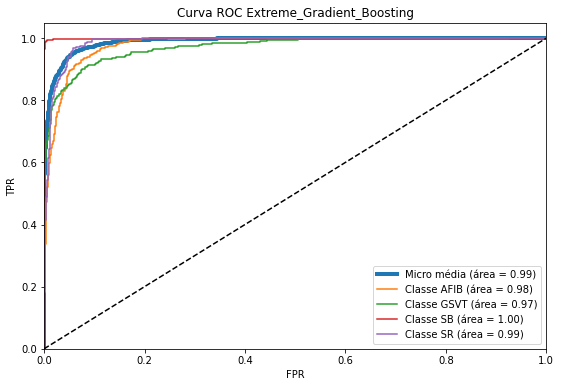

In [307]:
plot_roc_auc_curve(dummy_test_y, dec_funct_xgb, list(xgboost.classes_), 'Extreme_Gradient_Boosting')

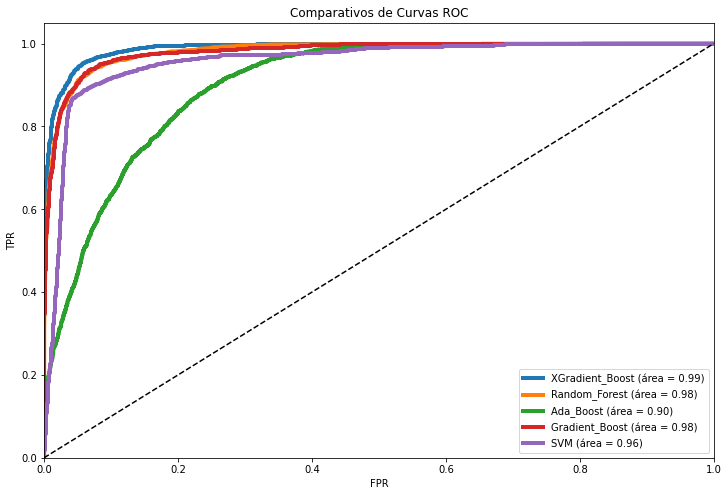

In [318]:
classifiers = ['XGradient_Boost','Random_Forest','Ada_Boost','Gradient_Boost','SVM']
dec_functs = [dec_funct_xgb, dec_funct_randf, dec_funct_clf, dec_funct_grd, dec_funct_svm]

plot_all_roc_auc_curves(dummy_test_y, dec_functs, classifiers)

## Testando o conjunto de dados original com o melhor modelo (XGradientBoost)

Sem aumento de características

In [21]:
#separando os dados em atributos e alvo
df_diagno_data, df_diagno_target = df_diagno.drop(['FileName','Rhythm', 'Beat', 'Rhythm_grouped'], axis=1), df_diagno[['Rhythm_grouped']] 

In [22]:
#dividindo o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_diagno_data, df_diago_target, test_size=0.2, random_state=1, shuffle=True)

In [24]:
#codificando o alvo em inteiros
encoder = LabelEncoder()
encoder.fit(y_test.values.squeeze())
encoded_test_y = encoder.transform(y_test)
dummy_test_y = np_utils.to_categorical(encoded_test_y)

C:\Users\rafae\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
scv =  StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scores_ = {'accuracy' : metrics.make_scorer(metrics.accuracy_score),
           'recall'   : metrics.make_scorer(metrics.recall_score, average='weighted', zero_division=0),
           'precision': metrics.make_scorer(metrics.precision_score, average='weighted', zero_division=0),
           'f1'       : metrics.make_scorer(metrics.fbeta_score, beta = 2, average='weighted' )}
xgboost = xgb.XGBClassifier(n_estimator=500, random_state=1, n_jobs=-1, learning_rate=0.1)

In [28]:
xgboost_result_original = cross_validate(xgboost, 
                                         X_train, 
                                         y_train, 
                                         scoring=scores_, 
                                         cv=scv, 
                                         n_jobs=-1,
                                         return_train_score=True)

In [29]:
print('Metrics using 10-fold validation')
print(f"Accuracy: {xgboost_result_original['test_accuracy'].mean():.2f}")
print(f"Recall: {xgboost_result_original['test_recall'].mean():.2f}")
print(f"Accuracy: {xgboost_result_original['test_precision'].mean():.2f}")
print(f"Accuracy: {xgboost_result_original['test_f1'].mean():.2f}")

Metrics using 10-fold validation
Accuracy: 0.90
Recall: 0.90
Accuracy: 0.90
Accuracy: 0.90


In [30]:
xgboost.fit(X_train,y_train)

C:\Users\rafae\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rafae\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rafae\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=500, n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [31]:
train_pred_original_xgb = xgboost.predict(X_train)
test_pred_original_xgb = xgboost.predict(X_test)

In [32]:
print(classification_report(y_train, train_pred_original_xgb))

              precision    recall  f1-score   support

        AFIB       0.95      0.91      0.93      1786
        GSVT       0.95      0.90      0.92      2155
          SB       1.00      1.00      1.00      3121
          SR       0.86      0.98      0.92      1454

    accuracy                           0.95      8516
   macro avg       0.94      0.95      0.94      8516
weighted avg       0.95      0.95      0.95      8516



In [33]:
print(classification_report(y_test, test_pred_original_xgb))

              precision    recall  f1-score   support

        AFIB       0.85      0.78      0.81       439
        GSVT       0.86      0.83      0.85       551
          SB       0.99      0.99      0.99       768
          SR       0.81      0.91      0.86       372

    accuracy                           0.89      2130
   macro avg       0.88      0.88      0.88      2130
weighted avg       0.90      0.89      0.89      2130



Text(609.9818181818181, 0.5, 'True label')

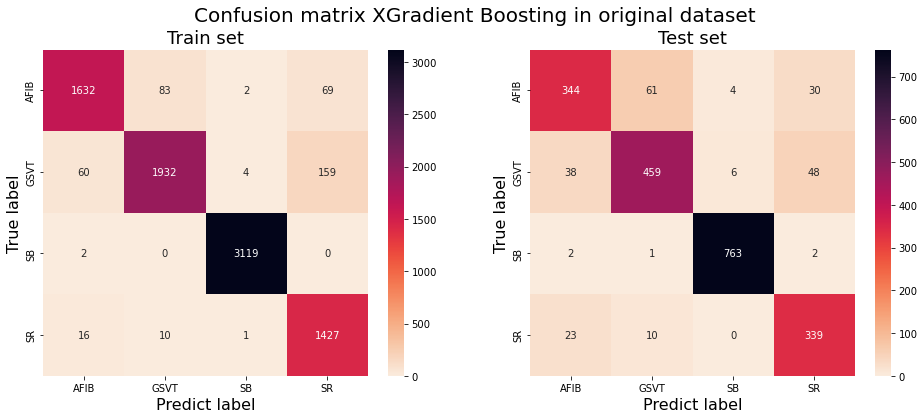

In [34]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

matrix_train_original_xgb = confusion_matrix(y_train, train_pred_original_xgb, labels=['AFIB','GSVT','SB','SR'])
matrix_test_original_xgb = confusion_matrix(y_test, test_pred_original_xgb, labels=['AFIB','GSVT','SB','SR'])

sns.heatmap(matrix_train_original_xgb, ax=ax[0],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r',)
sns.heatmap(matrix_test_original_xgb, ax=ax[1],
            xticklabels=['AFIB','GSVT','SB','SR'], 
            yticklabels=['AFIB','GSVT','SB','SR'],
            annot=True, 
            fmt='.0f', 
            cmap='rocket_r')
plt.suptitle('Confusion matrix XGradient Boosting in original dataset', fontsize=20)
ax[0].set_title('Train set', fontsize=18)
ax[0].set_xlabel('Predict label', fontsize=16)
ax[0].set_ylabel('True label', fontsize=16)
ax[1].set_title('Test set', fontsize=18)
ax[1].set_xlabel('Predict label', fontsize=16)
ax[1].set_ylabel('True label', fontsize=16)
#plt.savefig(os.path.abspath('./images/confusion_extreme_gradient_boosting.pdf'), dpi=300)

In [35]:
dec_funct_original_xgb = xgboost.predict_proba(X_test)

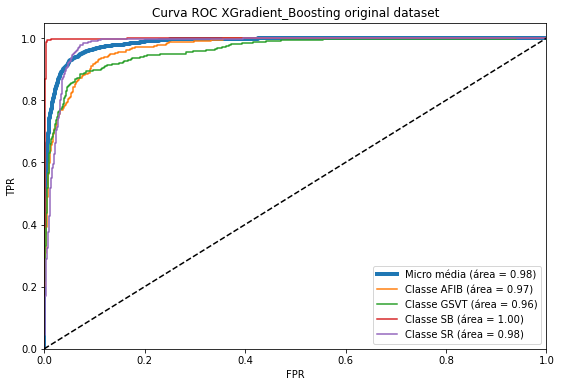

In [36]:
plot_roc_auc_curve(dummy_test_y, dec_funct_original_xgb, list(xgboost.classes_), 'XGradient_Boosting original dataset')

O comparativo da performance dos classificadores realizado através das curvas ROC AUC, podemos perceber que ambos os classificadores apresentaram um desempenho considerável em comparação com os resultados iniciais. O Extreme Gradient Boosting foi o que apresentou maior desempenho de 99% no conjunto de teste.

Realizando os testes no conjunto original sem a adição de características através do melhor modelo (XGradientBoost), percebe-se que há uma queda pequena nos resultados. A acurácia geral do conjunto de treinamento diminuiu 4% e do conjunto de teste diminuiu 1%. Análise a matriz de confusão de teste, a única classe que sofreou maior variação foi a AFIB, reduzindo 4,5%. 

Os resultados apresentaram melhora significativa nos resultados iniciais. As características geradas pela Discrete Wavelet Transform (DWT) da família **Daubechies**, especificamente a **db4**, aumentaram significativamente a caracterização dos dados. A DWT foi aplicada nos sinais sem ruídos disponibilizados no conjunto de dados, gerando 120 características por sinal. Esse valor se dá pelo fato da **db4** decompor o sinal em 10 sub-bandas de frequências diferentes e de cada sub-banda ser extraída 12 características totalizando 10x12=120 características. Apesar dessa geração de características, os testes com o conjunto original mostraram que o maior impacto foi em relação ao uso de algoritmos ensembles de ML, principalmente os da categoria _boosting_. Houve diminuição nos valores das métricas, mas nada significativo.